---
# **Zomato Restaurant Data Exploration Challenge**
---

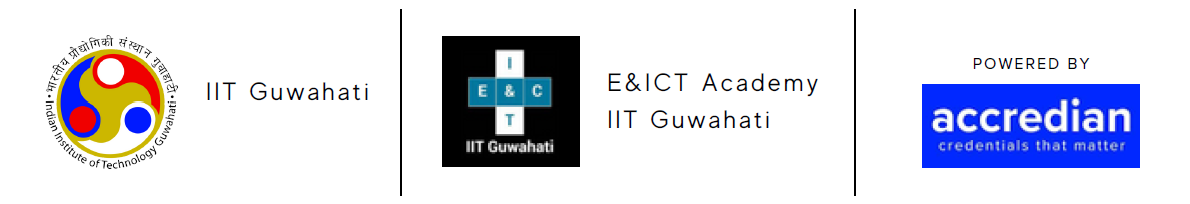

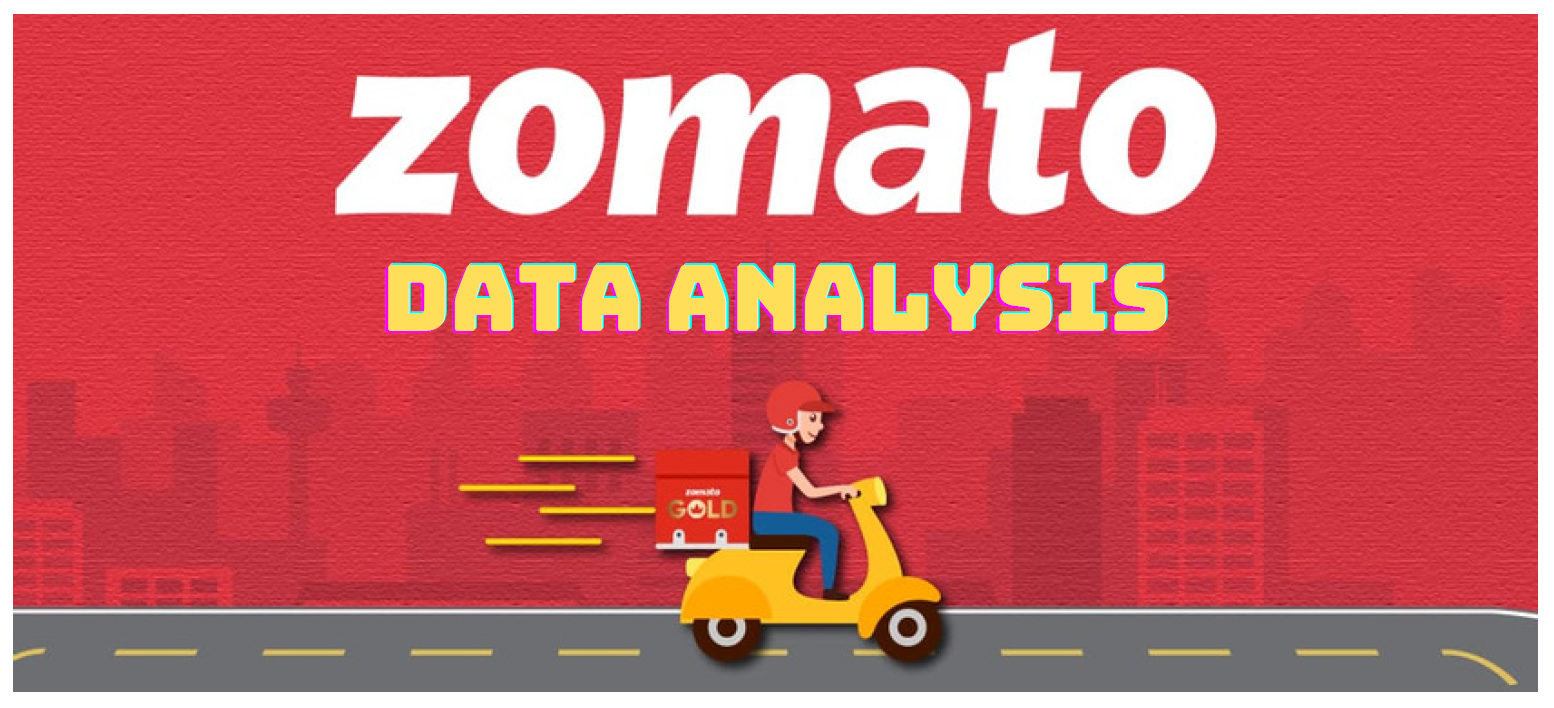

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---
    

---
<a name = Section1></a>
# **1. Introduction**
---

This project explores a comprehensive dataset of restaurants listed on Zomato, spanning various cities and countries. The dataset includes details such as cuisines, pricing, customer ratings, and service options. Through exploratory data analysis (EDA), we aim to uncover patterns and trends that influence restaurant success and customer satisfaction. By analyzing factors like location, cuisine type, and price range, this project seeks to provide valuable insights for restaurant owners, food enthusiasts, and service providers. The findings will shed light on market dynamics, customer preferences, and industry trends, contributing to a deeper understanding of the food and hospitality sector.

---
<a name = Section2></a>
# **2. Problem Statement**
---
Problem Statement:
In today’s competitive food service industry, understanding the factors that drive restaurant success and customer satisfaction is critical for staying ahead. This project aims to explore a rich dataset of restaurants from Zomato, covering cities and countries worldwide, with data on cuisines, pricing, customer ratings, and service options. Through exploratory data analysis (EDA), the project addresses a series of key questions aimed at uncovering actionable insights to benefit restaurant owners, service providers, and food enthusiasts.

The team’s mission is to analyze how factors such as location, price range, cuisine type, and service offerings influence ratings, customer engagement, and overall performance. Specific challenges include identifying top-rated cuisines within price segments, understanding the impact of online delivery on low-cost restaurants, and examining the distribution of table bookings among upscale eateries. Additionally, the analysis delves into the relationships between ratings, cost, and votes by cuisine, the influence of delivery availability on engagement, and strategies that boost customer satisfaction.

By answering these questions, the project will highlight market trends, consumer preferences, and actionable strategies. Ultimately, the goal is to derive one impactful insight that the company can implement to optimize operations, improve customer experience, and enhance market positioning.

### **Installing Libraries**

In [2]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

### **Upgrading Libraries**

- **After upgrading** the libraries, we need to **restart the runtime** to make the libraries in sync.

- We need to make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [3]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

### **Importing Libraries**

In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from ydata_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

The schema of the dataset is as follows:

|Sl|Variable|Defination|
|:--|:--|:--|
|01|Restaurant ID|Unique Identifier for each Restaurant|
|02|Restaurant Name|Name of the Restaurant|
|03|Country Code|Numeric code respresenting the country where the restaurant in located|
|04|City|The city where the restaurant is located|
|05|Address|Full address of the restaurant|
|06|Locality|Local area or neighborhood of the restaurant|
|07|Locality Verbose|A more detailed description of the locality, often including full neighborhood and city|
|08|Longitude & Latitude|Geographical coordinates of the restaurant's location|
|09|Cuisines|Types of cuisines offered by the restaurant|
|10|Average Cost for Two|Estimated Cost for two people to dine at the restaurant|
|11|Currency|Currency in which the costs are listed|
|12|Has Table Booking|Indicates if the restaurant offers table reservations (Yes/No)|
|13|Has Online Delivery|Indicates if the restaurant provides online delivery services (Yes/No)|
|14|Is delivering now|Shows if the restaurant is currently delivering (Yes/No)|
|15|Switch to order menu|Indicates if there's a special menu for ordering (Yes/No)|
|16|Price Range|A numerical range (1-4) representing the price category of restaurant|
|17|Aggregate rating|Average customer rating for the restaurant, on a scale (e.g., 1.0 to 5.0)|
|18|Rating Color|Color code representing the rating category, such as 'Dark Green' for high ratings|
|19|Rating Text|Descriptive rating text like "Excellent" or Very Good"|
|20|Votes|Number of votes or reviews given by customers|

In [5]:
# Google Drive direct download link
zomatoDataset = 'https://drive.google.com/uc?id=16WmwE2B4sGQ1buh8qcnyWD1Ppp6ydqPo'

# Read the CSV file with a different encoding
df = pd.read_csv(zomatoDataset, encoding='latin1')

# Print the shape of the DataFrame
print('Data Shape:', df.shape)

Data Shape: (9551, 21)


### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### **Data Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- To perform pandas profiling and get some observations out of it...

In [8]:
#preprofile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#preprofile.to_notebook_iframe()

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data we need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [9]:
# Check for missing values
missing_values = df.isna().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [10]:
# Summary statistics of numerical columns
print(df.describe())

# Summary statistics of categorical columns
print(df.describe(include=['O']))


       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [11]:
# prompt: find duplicate rows and its count

duplicate_rows_df = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows_df)
print("Duplicate rows and their count")
print(df.duplicated().sum())

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []

[0 rows x 21 columns]
Duplicate rows and their count
0


In [12]:
# Number of unique values in each column
print(df.nunique())

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64


In [13]:
# Drop duplicate rows
df = df.drop_duplicates()

# Fill missing values or drop columns with excessive missing data
df = df.ffill()


In [14]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [15]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

In [16]:
#postprofile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#postprofile.to_notebook_iframe()

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

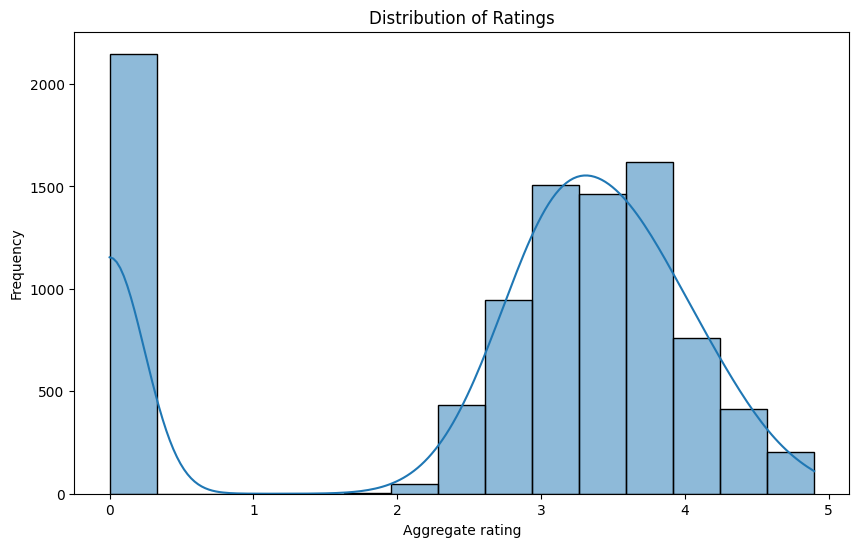

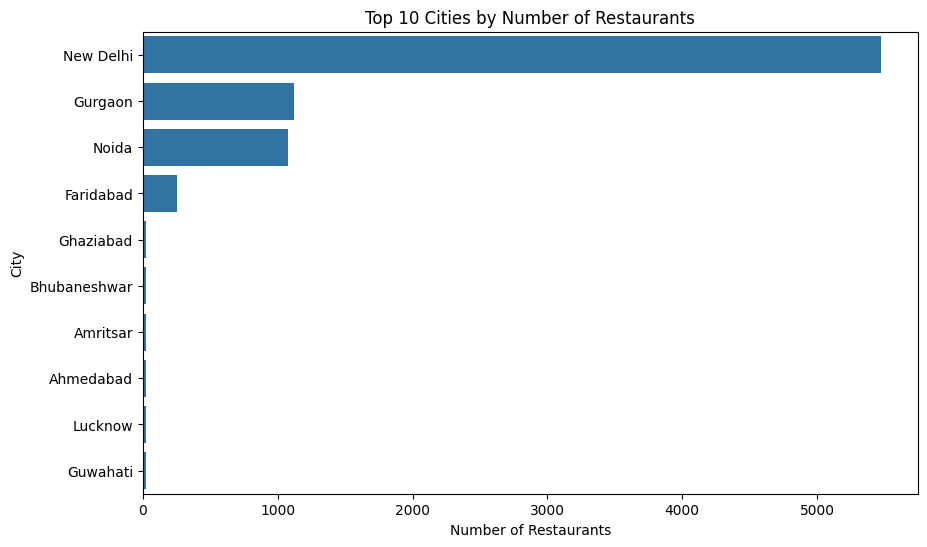

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of a relevant column
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=15, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.show()

# Example: Top 10 Cities by Number of Restaurants
plt.figure(figsize=(10, 6))
sns.countplot(y='City', data=df, order=df['City'].value_counts().head(10).index)
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


**1. Cuisine & Rating by Price Segment**

Question: What are the top 5 cuisines offered by highly rated restaurants (with ratings above 4) within each price range, and how do these preferences vary across top 5 different cities by the number of highly rated restaurants ?

In [17]:
df_cuisine = df[['City', 'Cuisines','Price range','Aggregate rating']].copy()
df_cuisine.head()

,City,Cuisines,Price range,Aggregate rating
0,Makati City,"French, Japanese, Desserts",3,4.8
1,Makati City,Japanese,3,4.5
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
3,Mandaluyong City,"Japanese, Sushi",4,4.9
4,Mandaluyong City,"Japanese, Korean",4,4.8


In [18]:
highly_rated = df_cuisine[df_cuisine['Aggregate rating'] > 4]
highly_rated.head()

,City,Cuisines,Price range,Aggregate rating
0,Makati City,"French, Japanese, Desserts",3,4.8
1,Makati City,Japanese,3,4.5
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
3,Mandaluyong City,"Japanese, Sushi",4,4.9
4,Mandaluyong City,"Japanese, Korean",4,4.8


       Cuisines  Count
0  North Indian    152
1       Italian    144
2       Chinese    124
3          Cafe    119
4   Continental    110


<ipython-input-19-19503b1d419c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuisines', y='Count', data=top_5_cuisines, palette='viridis')


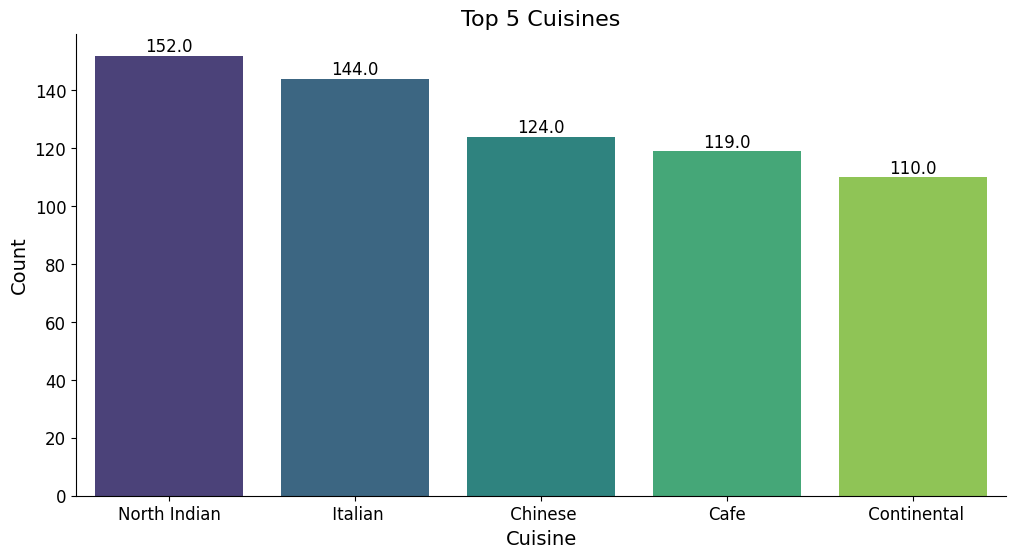

In [19]:
# Split the 'Cuisines' column into separate rows
df_exploded = highly_rated['Cuisines'].str.split(',').explode()

# Create a new DataFrame with value counts for each cuisine
df_counts = df_exploded.value_counts().to_frame(name='Count').reset_index()

# Sort by count in descending order and select the top 5 rows
top_5_cuisines = df_counts.sort_values(by='Count', ascending=False).head(5)

# Print the resulting DataFrame
print(top_5_cuisines)

# Plot the Top 5 Cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisines', y='Count', data=top_5_cuisines, palette='viridis')

# Customize plot aesthetics
plt.title('Top 5 Cuisines', fontsize=16)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

# Add data labels
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)

plt.show()

In [20]:
highly_rated.head(25)

,City,Cuisines,Price range,Aggregate rating
0,Makati City,"French, Japanese, Desserts",3,4.8
1,Makati City,Japanese,3,4.5
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4
3,Mandaluyong City,"Japanese, Sushi",4,4.9
4,Mandaluyong City,"Japanese, Korean",4,4.8
5,Mandaluyong City,Chinese,3,4.4
7,Pasay City,"Seafood, Filipino, Asian, European",4,4.2
8,Pasay City,"European, Asian, Indian",4,4.9
9,Pasig City,Filipino,3,4.8
10,Pasig City,"Filipino, Mexican",3,4.9


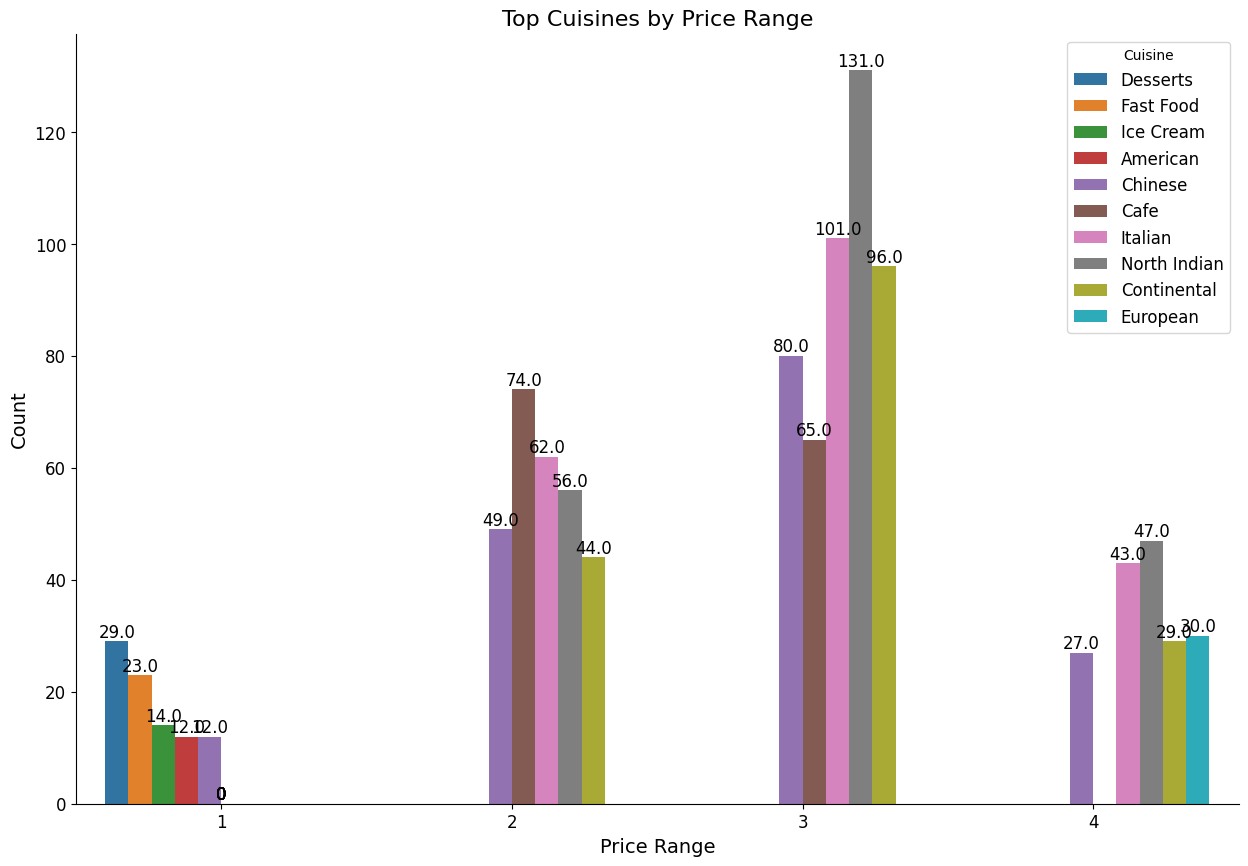

In [21]:
# Split the 'Cuisines' column into multiple rows
cuisines_split = highly_rated['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
highly_rated = highly_rated.drop(columns=['Cuisines']).join(cuisines_split.rename('Cuisines'))

# Initialize an empty DataFrame to store the results
top_cuisines = pd.DataFrame()

# Iterate through each price range
for price_range in highly_rated['Price range'].unique():
    # Filter the data for the current price range
    subset = highly_rated[highly_rated['Price range'] == price_range]
    # Group by cuisine and count the occurrences
    grouped = subset.groupby('Cuisines').size().reset_index(name='Count')
    # Get the top 5 cuisines
    top_5 = grouped.nlargest(5, 'Count')
    # Add price range column
    top_5['Price range'] = price_range
    # Append to the results DataFrame
    top_cuisines = pd.concat([top_cuisines, top_5], ignore_index=True)

# Plotting
plt.figure(figsize=(15, 10))
ax = sns.barplot(
    data=top_cuisines,
    x='Price range',
    y='Count',
    hue='Cuisines',
)

# Customize plot aesthetics
plt.title('Top Cuisines by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)

plt.legend(title='Cuisine', fontsize=12)  # Customize legend

plt.show()

        Cuisines  Count       City  Price range
0   North Indian     45  New Delhi            3
1    Continental     40  New Delhi            3
2        Italian     35  New Delhi            3
3        Chinese     22  New Delhi            3
4          Asian     19  New Delhi            3
..           ...    ...        ...          ...
83       Chinese      1  Bangalore            1
84      Desserts      1  Bangalore            1
85       Italian      1  Bangalore            1
86  North Indian      1  Bangalore            1
87   Street Food      1  Bangalore            1

[88 rows x 4 columns]


<ipython-input-24-3eee56f2516a>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Count', y='Cuisines', ax=ax, palette=palette)
<ipython-input-24-3eee56f2516a>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Count', y='Cuisines', ax=ax, palette=palette)
<ipython-input-24-3eee56f2516a>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Count', y='Cuisines', ax=ax, palette=palette)
<ipython-input-24-3eee56f2516a>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

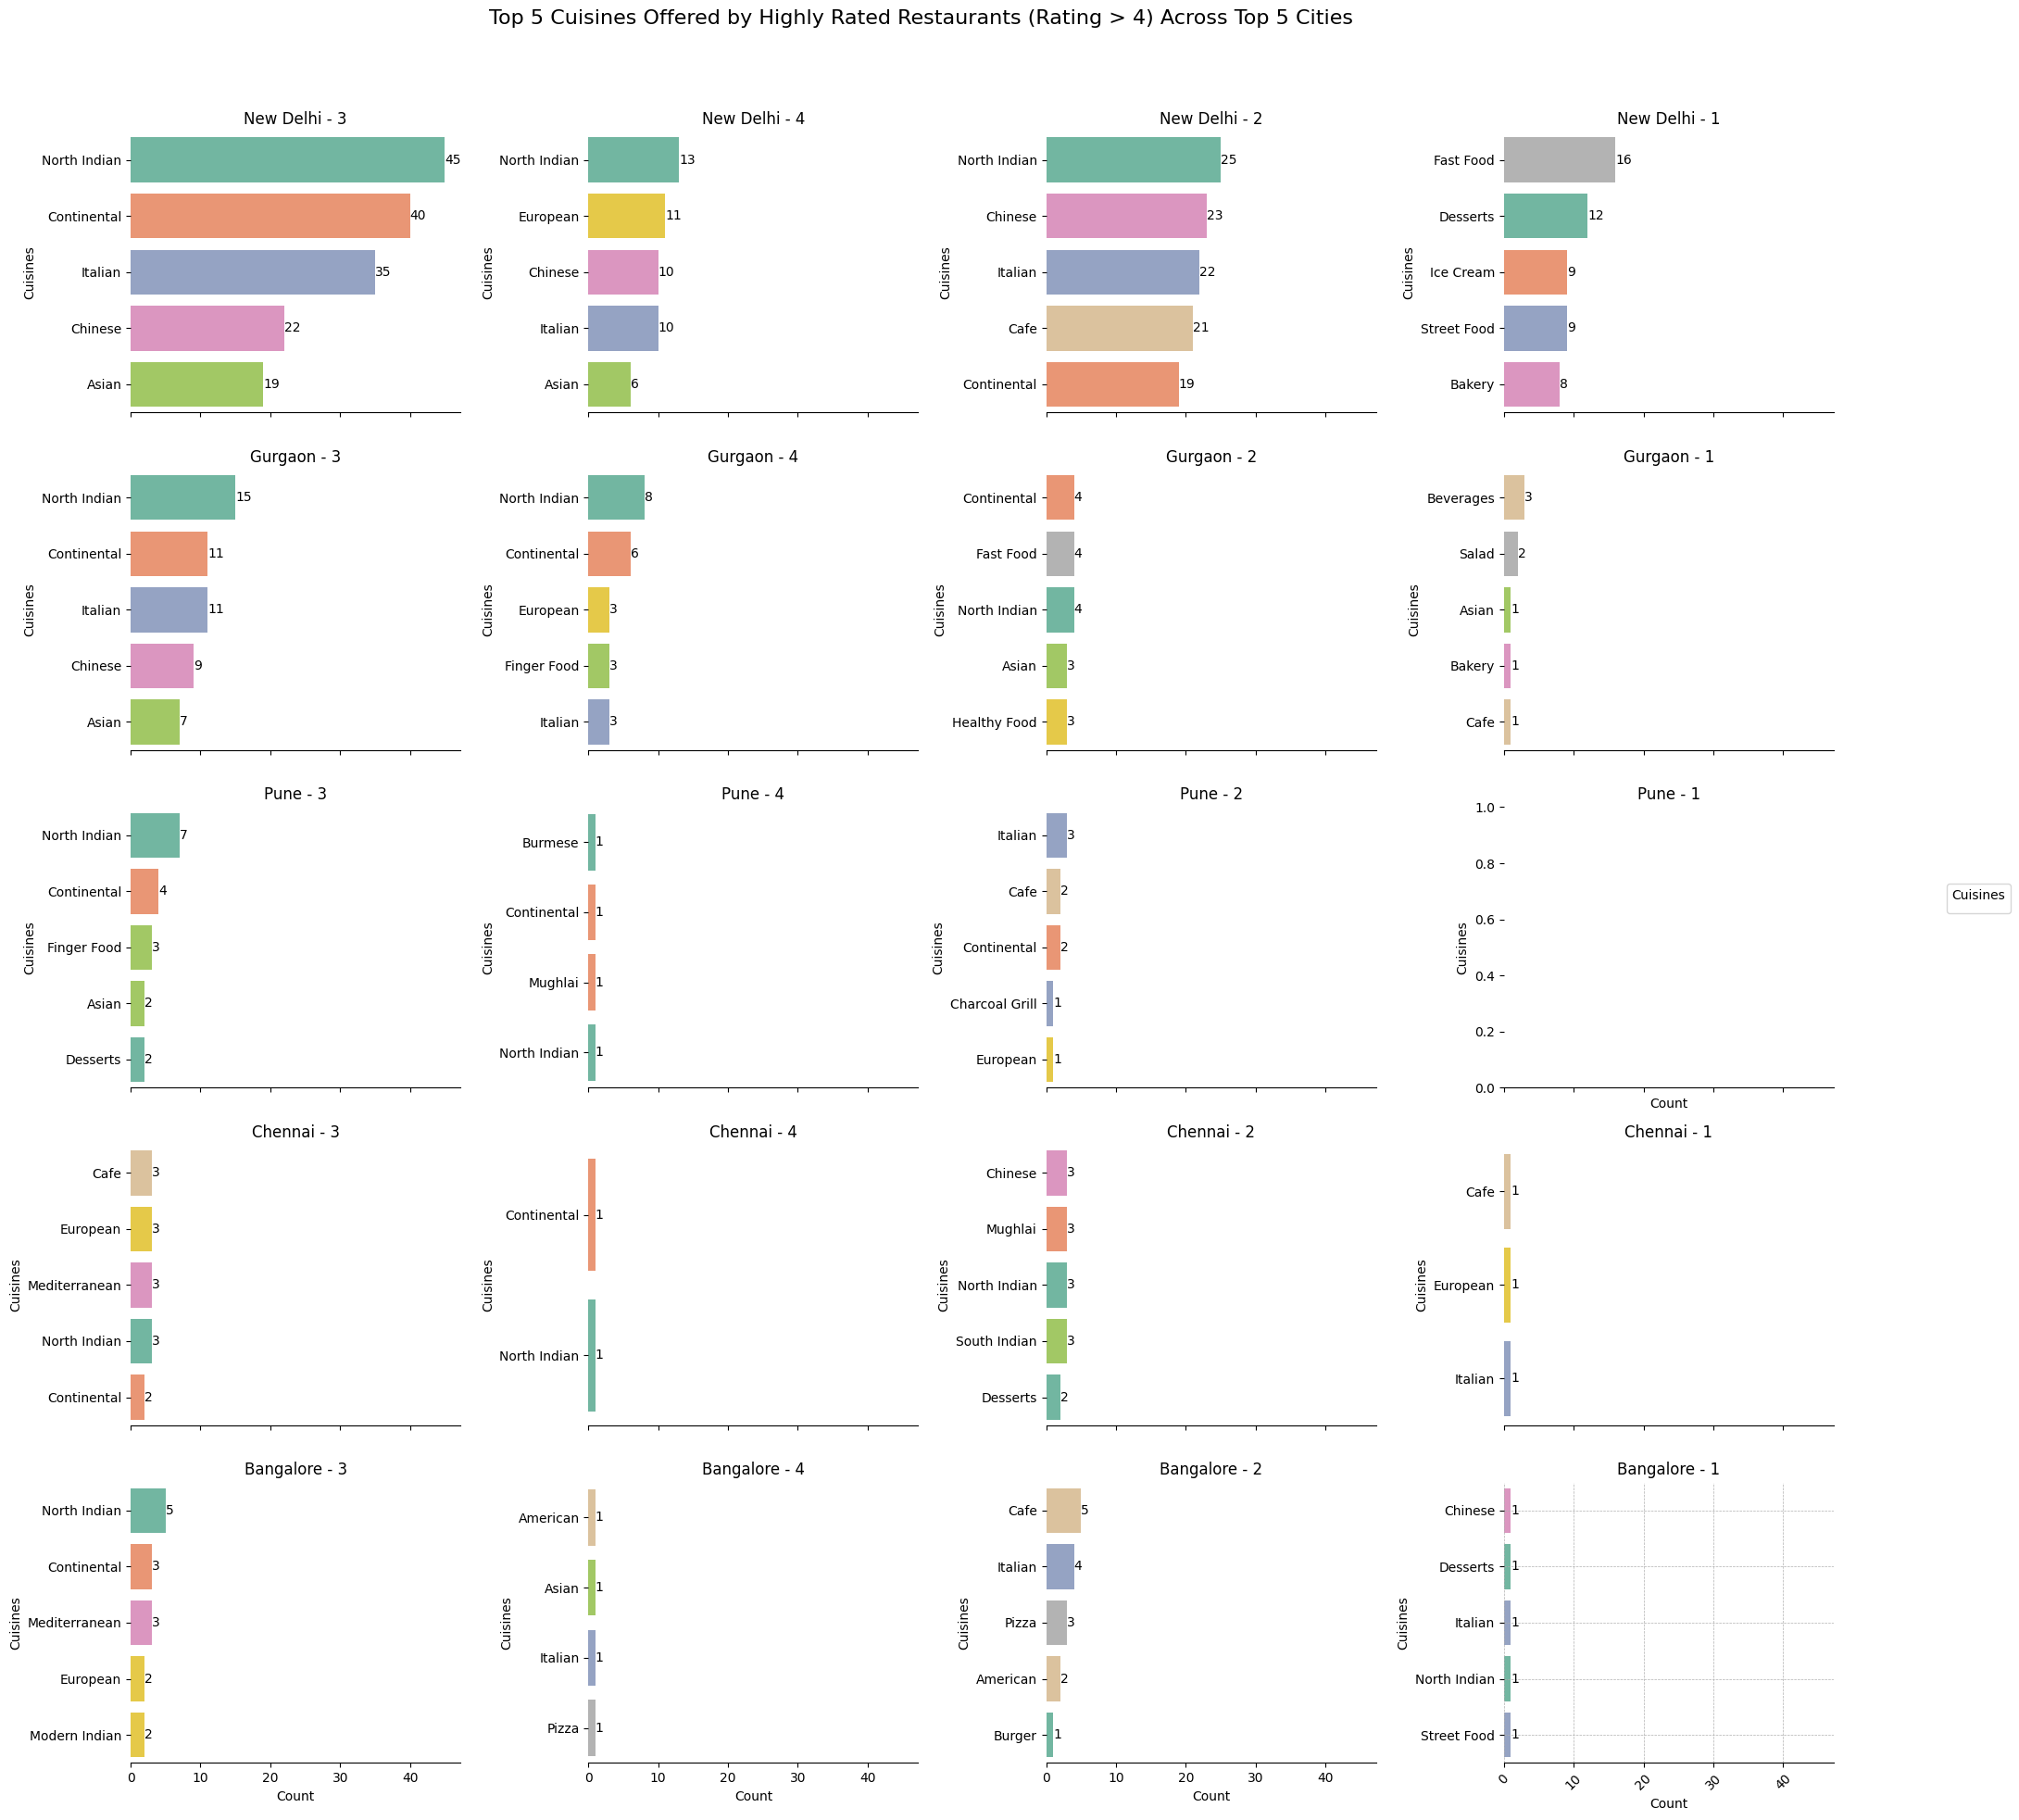

In [24]:
# Filter the data for highly rated restaurants (rating above 4)
highly_rated = df[df['Aggregate rating'] > 4]

# Split the 'Cuisines' column into multiple rows
cuisines_split = highly_rated['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
highly_rated = highly_rated.drop(columns=['Cuisines']).join(cuisines_split.rename('Cuisines'))

# Find top 5 cities by number of highly rated restaurants
top_cities = highly_rated['City'].value_counts().head(5).index

# Initialize an empty DataFrame to store the results
top_cuisines = pd.DataFrame()

# Iterate through each city and price range
for city in top_cities:
    for price_range in highly_rated['Price range'].unique():
        # Filter the data for the current city and price range
        subset = highly_rated[(highly_rated['City'] == city) & (highly_rated['Price range'] == price_range)]
        # Group by cuisine and count the occurrences
        grouped = subset.groupby('Cuisines').size().reset_index(name='Count')
        # Get the top 5 cuisines
        top_5 = grouped.nlargest(5, 'Count')
        # Add city and price range columns
        top_5['City'] = city
        top_5['Price range'] = price_range
        # Append to the results DataFrame
        top_cuisines = pd.concat([top_cuisines, top_5], ignore_index=True)

# Display the results
print(top_cuisines)
merged_df = pd.merge( highly_rated, top_cuisines, on=['City', 'Price range', 'Cuisines'], how='inner' ) # Display the first few rows of the merged dataframe print

# Plotting
unique_cuisines = top_cuisines['Cuisines'].unique()
palette = dict(zip(unique_cuisines, sns.color_palette("Set2", len(unique_cuisines))))

cities = top_cuisines['City'].unique()
price_ranges = top_cuisines['Price range'].unique()

fig, axes = plt.subplots(len(cities), len(price_ranges), figsize=(20, 20), sharex=True)
fig.suptitle('Top 5 Cuisines Offered by Highly Rated Restaurants (Rating > 4) Across Top 5 Cities', fontsize=16)

for i, city in enumerate(cities):
    for j, price_range in enumerate(price_ranges):
        ax = axes[i, j]
        subset = top_cuisines[(top_cuisines['City'] == city) & (top_cuisines['Price range'] == price_range)]
        sns.barplot(data=subset, x='Count', y='Cuisines', ax=ax, palette=palette)
        ax.set_title(f'{city} - {price_range}', fontsize=12)  # Shorten price range title
        ax.set_xlabel('Count')
        plt.xticks(rotation=45)  # Rotate cuisine labels
        ax.set_ylabel('Cuisines')
        for container in ax.containers:
            ax.bar_label(container)
        # Optional: Add grid lines and adjust spines
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        sns.despine(left=True)

# Adjust the layout and add the common legend
plt.tight_layout(rect=[0, 0, 1, 0.95])
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Cuisines', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()

**2. Online Delivery Influence on Low-Cost High-Rating Restaurants**

Question: Among low-cost restaurants (price range = 1), how many offer
online delivery and have a rating above 4.0? How does this compare to
those that don’t offer delivery in terms of customer engagement (votes)?

In [26]:
# Filter for low-cost restaurants (price range = 1) with a rating above 4.0
low_cost_high_rating = merged_df[(merged_df['Price range'] == 1) & (merged_df['Aggregate rating'] > 4.0)]

# Calculate the number of restaurants offering online delivery and those that don't
delivery_counts = low_cost_high_rating['Has Online delivery'].value_counts()

# Compare customer engagement (votes)
delivery_votes = low_cost_high_rating[low_cost_high_rating['Has Online delivery'] == 'Yes']['Votes'].mean()
no_delivery_votes = low_cost_high_rating[low_cost_high_rating['Has Online delivery'] == 'No']['Votes'].mean()

print(f"Number of low-cost, highly-rated restaurants offering online delivery: {delivery_counts.get('Yes', 0)}")
print(f"Number of low-cost, highly-rated restaurants not offering online delivery: {delivery_counts.get('No', 0)}")
print(f"Average votes for restaurants with delivery: {delivery_votes:.2f}")
print(f"Average votes for restaurants without delivery: {no_delivery_votes:.2f}")


Number of low-cost, highly-rated restaurants offering online delivery: 38
Number of low-cost, highly-rated restaurants not offering online delivery: 32
Average votes for restaurants with delivery: 391.03
Average votes for restaurants without delivery: 825.19


<ipython-input-27-d637655d07d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=delivery_counts.index, y=delivery_counts.values, palette='Set1')


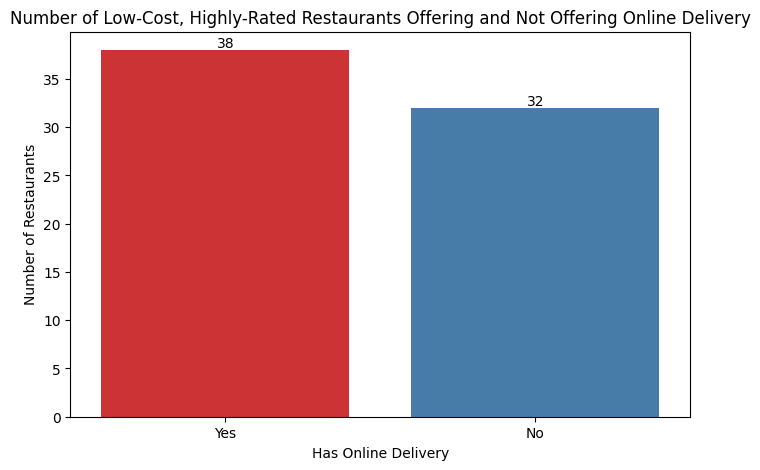

<ipython-input-27-d637655d07d7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=['With Delivery', 'Without Delivery'], y=[delivery_votes, no_delivery_votes], palette='Set2')


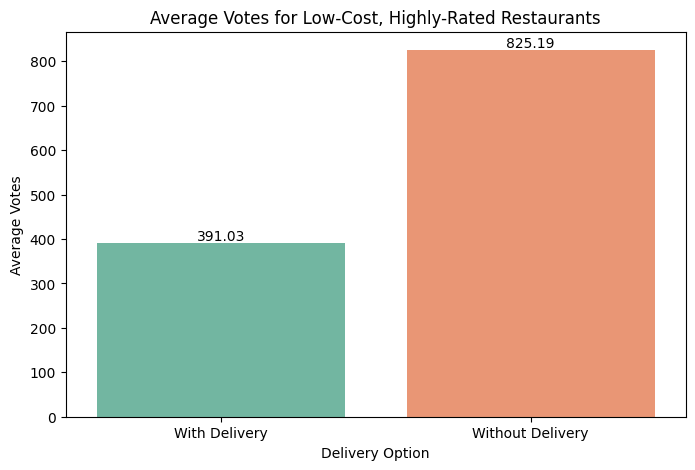

In [27]:
# Bar plot for number of restaurants offering and not offering delivery
plt.figure(figsize=(8, 5))
ax1 = sns.barplot(x=delivery_counts.index, y=delivery_counts.values, palette='Set1')
plt.title('Number of Low-Cost, Highly-Rated Restaurants Offering and Not Offering Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Number of Restaurants')

# Adding data labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.show()
# Bar plot for average votes
plt.figure(figsize=(8, 5))
ax2 = sns.barplot(x=['With Delivery', 'Without Delivery'], y=[delivery_votes, no_delivery_votes], palette='Set2')
plt.title('Average Votes for Low-Cost, Highly-Rated Restaurants')
plt.xlabel('Delivery Option')
plt.ylabel('Average Votes')

# Adding data labels
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, color='black')

plt.show()

**3. Table Booking vs. Rating by Location and Price Range**

Question: What is the distribution of table booking availability among
upscale (price range = 3 or 4) restaurants in the top 5 Indian cities based
on votes ?

In [29]:
# Filter for upscale restaurants (price range = 3 or 4)
upscale_restaurants = merged_df[merged_df['Price range'].isin([3, 4])]

In [30]:
# Filter Indian cities (assuming 'Country Code' for India is 1)
indian_restaurants = upscale_restaurants[upscale_restaurants['Country Code'] == 1]

# Find top 5 cities based on votes
top_cities_votes = indian_restaurants.groupby('City')['Votes'].sum().sort_values(ascending=False).head(5).index
top_cities_data = indian_restaurants[indian_restaurants['City'].isin(top_cities_votes)]


In [31]:
# Analyze table booking availability in these cities
table_booking_distribution = top_cities_data.groupby(['City', 'Has Table booking']).size().unstack().fillna(0)

# Display the distribution
print(table_booking_distribution)


Has Table booking  No  Yes
City                      
Bangalore          10    9
Chennai             9    7
Gurgaon            20   56
New Delhi          61  150
Pune                8   14


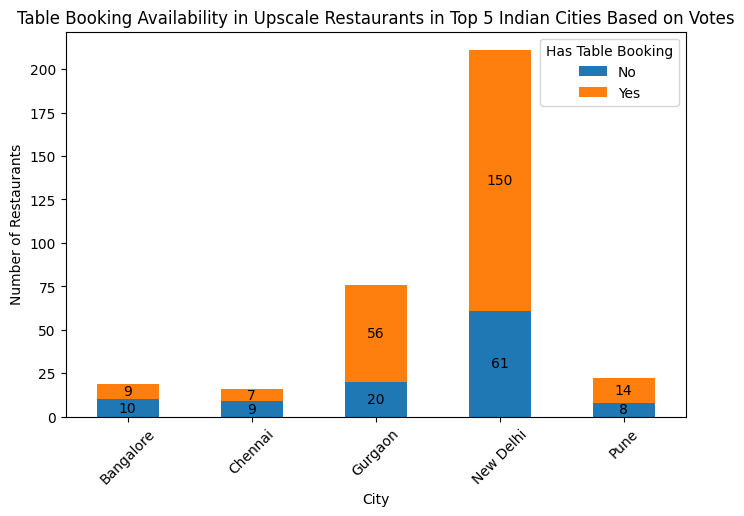

In [65]:

# Plot the distribution
ax = table_booking_distribution.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Table Booking Availability in Upscale Restaurants in Top 5 Indian Cities Based on Votes')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.legend(title='Has Table Booking')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, color='black')

plt.show()

**4. Relationship Between Votes, Cost, and Ratings by Cuisine Type**

Question: For Excellent rated cuisine type, how does the average cost for
two and the number of votes correlate with ratings? Are there cuisines
where lower-cost restaurants tend to have higher customer engagement?

Correlation Matrix:
                       Aggregate rating  Average Cost for two     Votes
Aggregate rating              1.000000              0.133415  0.142441
Average Cost for two          0.133415              1.000000  0.196173
Votes                         0.142441              0.196173  1.000000


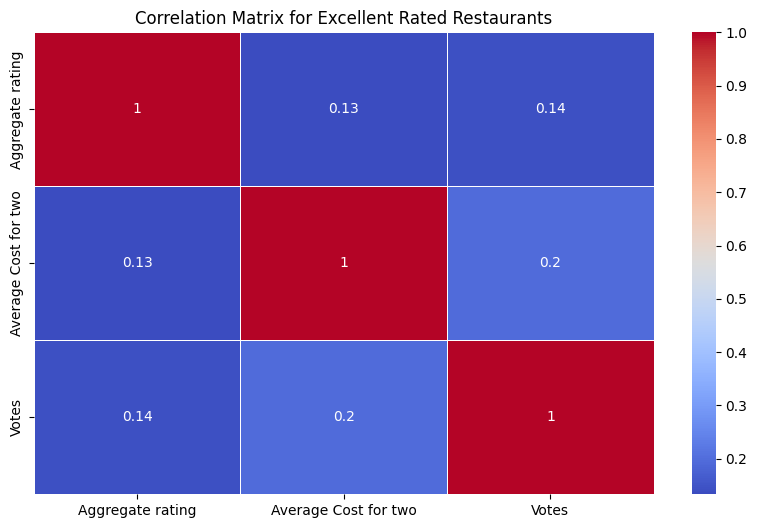

In [39]:
# Filter for Excellent rated restaurants (rating above 4.5)
excellent_rated = merged_df[merged_df['Aggregate rating'] > 4.5]

# Calculate correlations
correlation_matrix = excellent_rated[['Aggregate rating', 'Average Cost for two', 'Votes']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.7)
plt.title('Correlation Matrix for Excellent Rated Restaurants')
plt.show()

In [66]:
excellent_rated.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines,Count
1,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,2400,...,Yes,No,No,4,4.7,Dark Green,Excellent,2369,Asian,1
2,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,...,No,No,No,4,4.8,Dark Green,Excellent,10934,Italian,1
3,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,...,No,No,No,4,4.8,Dark Green,Excellent,10934,American,1
4,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,...,No,No,No,4,4.8,Dark Green,Excellent,10934,Pizza,1
9,18359919,Onesta,1,Bangalore,"Site 15, 15th Cross, 100 Feet Road, 4th Phase,...",JP Nagar,"JP Nagar, Bangalore",77.596791,12.906229,600,...,No,No,No,2,4.6,Dark Green,Excellent,781,Pizza,3


In [67]:
acft_des = excellent_rated['Average Cost for two']
acft_des.describe()

,Average Cost for two
count,69.000000
mean,1195.652174
std,547.906385
min,150.000000
25%,700.000000
50%,1200.000000
75%,1500.000000
max,2400.000000


In [40]:
# Identify cuisines with higher engagement for lower cost
cuisine_engagement = excellent_rated.groupby('Cuisines').agg({
    'Average Cost for two': 'mean',
    'Votes': 'mean',
    'Aggregate rating': 'mean'
}).reset_index()

# Filter for lower cost and higher engagement
lower_cost_higher_engagement = cuisine_engagement[
    (cuisine_engagement['Average Cost for two'] < cuisine_engagement['Average Cost for two'].median()) &
    (cuisine_engagement['Votes'] > cuisine_engagement['Votes'].median())]

In [68]:
value_counts = excellent_rated['City'].value_counts()
value_counts

,count
City,
New Delhi,26
Bangalore,19
Gurgaon,16
Chennai,7
Pune,1


In [41]:
# Display the cuisines with lower cost and higher engagement
print(lower_cost_higher_engagement)

    Cuisines  Average Cost for two        Votes  Aggregate rating
2     Burger            800.000000  9667.000000          4.700000
3       Cafe            741.666667  2330.833333          4.650000
6   Desserts           1000.000000  2510.000000          4.800000
14     Pizza           1066.666667  4114.000000          4.666667


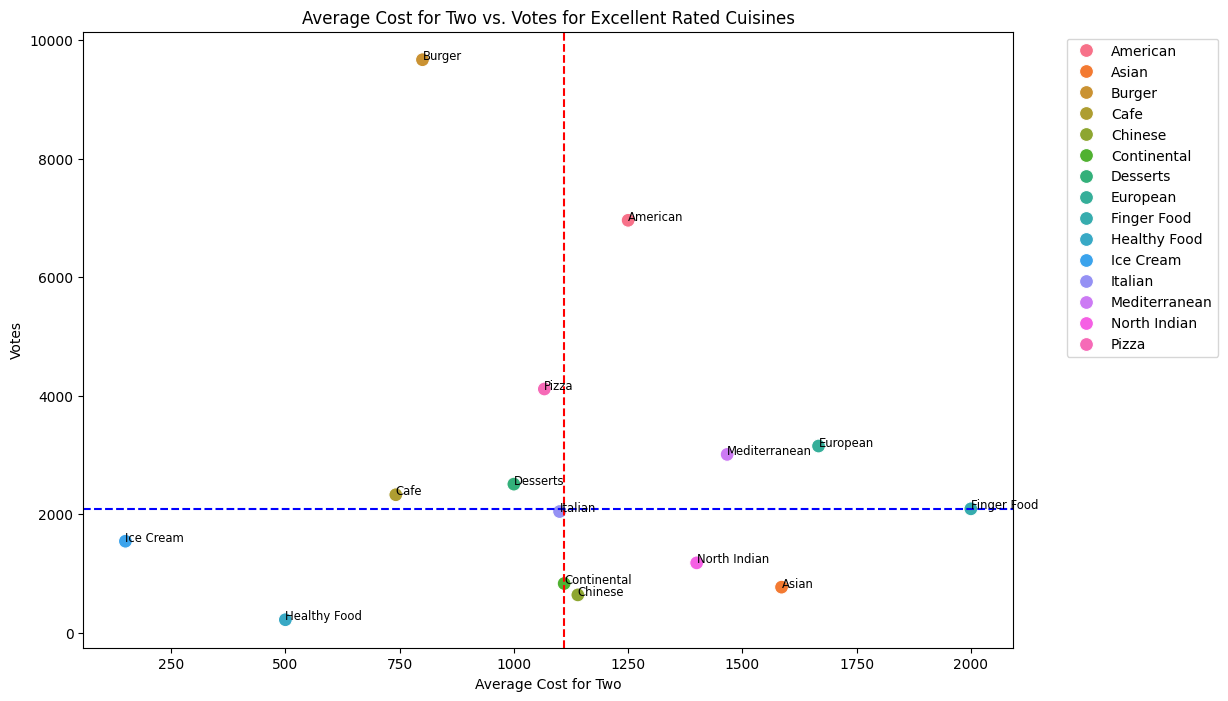

In [71]:
# Visualize the relationship between cost and engagement for cuisines
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='Average Cost for two', y='Votes', hue='Cuisines', data=cuisine_engagement, s=100)
# Add labels
for line in range(0, cuisine_engagement.shape[0]):
  plt.text(cuisine_engagement['Average Cost for two'][line], cuisine_engagement['Votes'][line],
           cuisine_engagement['Cuisines'][line], horizontalalignment='left', size='small', color='black')

plt.axvline(x=cuisine_engagement['Average Cost for two'].median(), color='red', linestyle='--')
plt.axhline(y=cuisine_engagement['Votes'].median(), color='blue', linestyle='--')
plt.title('Average Cost for Two vs. Votes for Excellent Rated Cuisines')
plt.xlabel('Average Cost for Two')
plt.ylabel('Votes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [43]:
merged_df.shape

(580, 22)

**5. Impact of Location, Cost, and Delivery on Rating Colors**

Question: How do the average cost for two, combined with delivery
availability and city location, influence customer ratings and restaurant
performance (e.g., number of votes) across the top 5 cities with the
highest engagement? What pricing strategies and delivery options lead
to higher customer engagement and satisfaction in specific cities?

In [72]:
# Filter the data for highly rated restaurants (rating above 4)
highly_rated = merged_df[merged_df['Aggregate rating'] > 4]

# Convert 'Has Online delivery' column to numeric
highly_rated['Has Online delivery'] = highly_rated['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Split the 'Cuisines' column into multiple rows
cuisines_split = highly_rated['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
highly_rated = highly_rated.drop(columns=['Cuisines']).join(cuisines_split.rename('Cuisines'))

# Find top 5 cities by the number of votes
top_cities = highly_rated.groupby('City')['Votes'].sum().sort_values(ascending=False).head(5).index
top_cities_data = highly_rated[highly_rated['City'].isin(top_cities)]

# Display the filtered data
top_cities_data.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Count,Cuisines
0,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...","BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,1300,...,NaN,No,No,3,4.1,Green,Very Good,2416,5,North Indian
1,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,2400,...,NaN,No,No,4,4.7,Dark Green,Excellent,2369,1,Asian
2,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,...,NaN,No,No,4,4.8,Dark Green,Excellent,10934,1,Italian
3,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,...,NaN,No,No,4,4.8,Dark Green,Excellent,10934,1,American
4,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,...,NaN,No,No,4,4.8,Dark Green,Excellent,10934,1,Pizza


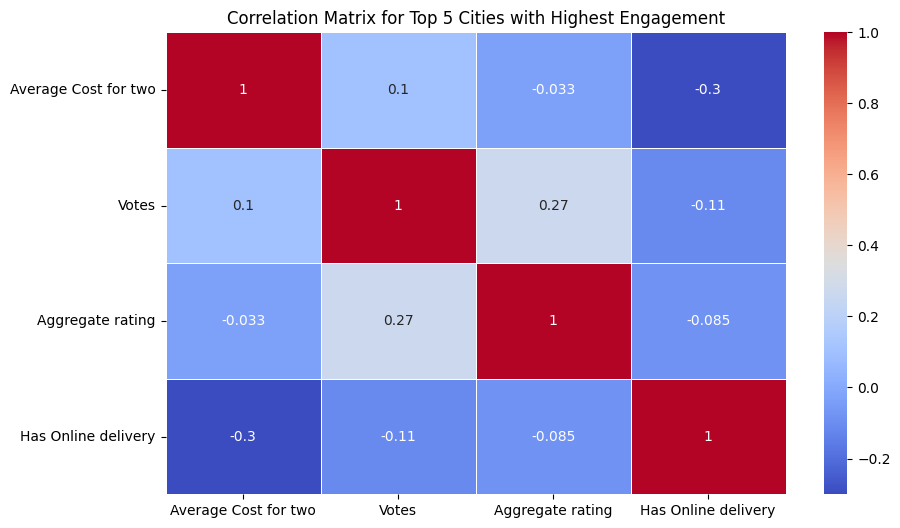

In [45]:
# Calculate the correlation matrix
correlation_matrix = top_cities_data[['Average Cost for two', 'Votes', 'Aggregate rating', 'Has Online delivery']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Top 5 Cities with Highest Engagement')
plt.show()

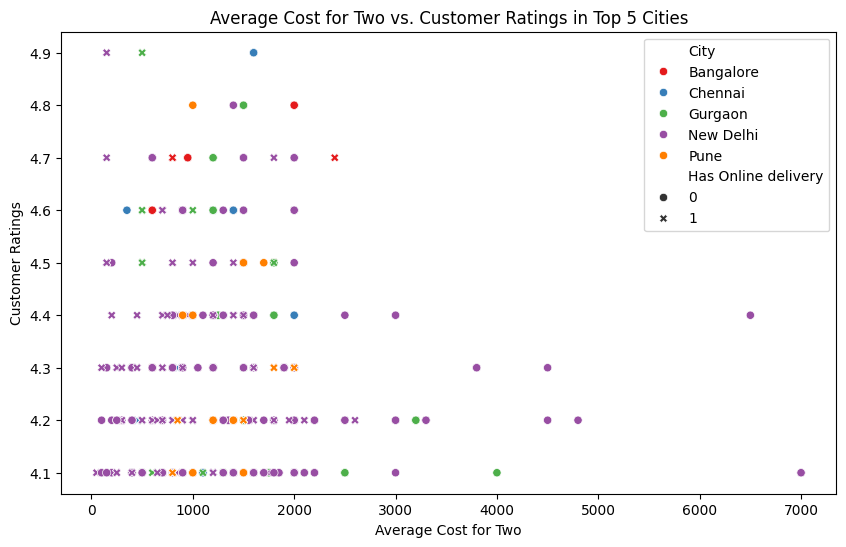

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_cities_data,
    x='Average Cost for two',
    y='Aggregate rating',
    hue='City',
    style='Has Online delivery',
    palette='Set1'
)
plt.title('Average Cost for Two vs. Customer Ratings in Top 5 Cities')
plt.xlabel('Average Cost for Two')
plt.ylabel('Customer Ratings')
plt.show()

**6. Cuisine-Specific Rating Distribution in High-Vote Restaurants**

Question: Among restaurants with a high number of votes (top 10% of
votes), what is the rating distribution across top cuisines, and how does it differ by price range?

In [73]:
# Convert 'Has Online delivery' column to numeric
merged_df['Has Online delivery'] = merged_df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Filter the data for highly rated restaurants (rating above 4)
highly_rated = merged_df[merged_df['Aggregate rating'] > 4]

# Split the 'Cuisines' column into multiple rows
cuisines_split = highly_rated['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
highly_rated = highly_rated.drop(columns=['Cuisines']).join(cuisines_split.rename('Cuisines'))

# Determine the threshold for the top 10% of votes
threshold_votes = highly_rated['Votes'].quantile(0.90)

# Filter the data for the top 10% of votes
top_voted_restaurants = highly_rated[highly_rated['Votes'] >= threshold_votes]

# Display the filtered data
top_voted_restaurants.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Count,Cuisines
0,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...","BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,1300,...,NaN,No,No,3,4.1,Green,Very Good,2416,5,North Indian
1,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,2400,...,NaN,No,No,4,4.7,Dark Green,Excellent,2369,1,Asian
2,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,...,NaN,No,No,4,4.8,Dark Green,Excellent,10934,1,Italian
3,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,...,NaN,No,No,4,4.8,Dark Green,Excellent,10934,1,American
4,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,...,NaN,No,No,4,4.8,Dark Green,Excellent,10934,1,Pizza


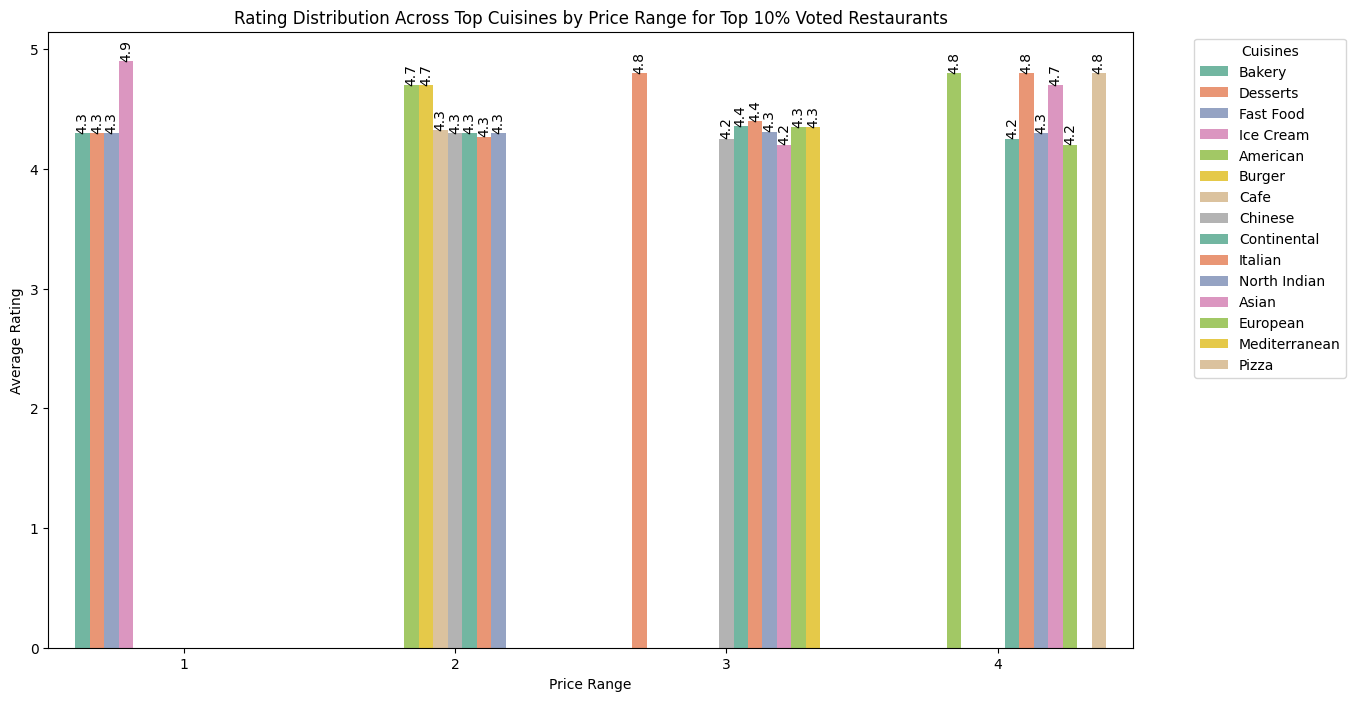

In [48]:
# Group by cuisine and price range, then calculate the average rating
rating_distribution = top_voted_restaurants.groupby(['Cuisines', 'Price range'])['Aggregate rating'].mean().reset_index()

# Visualize the rating distribution
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=rating_distribution,
    x='Price range',
    y='Aggregate rating',
    hue='Cuisines',
    palette='Set2'
)

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10, color='black', rotation=90)

plt.title('Rating Distribution Across Top Cuisines by Price Range for Top 10% Voted Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.legend(title='Cuisines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**7. Service Influence on Cost and Rating for Different Cities**

Question: How does the total number of votes and aggregate ratings of
the top 10 restaurants in India vary across different cities, and what
insights can be drawn from the relationship between votes and ratings for
these high-engagement restaurants?

In [49]:
# Filter the data for Indian restaurants
india_restaurants = merged_df[merged_df['Country Code'] == 1]  # Assuming 'Country Code' for India is 1

# Identify the top 10 restaurants by the number of votes
top_10_restaurants = india_restaurants.nlargest(10, 'Votes')

# Display the top 10 restaurants
print(top_10_restaurants[['Restaurant Name', 'City', 'Votes', 'Aggregate rating']])


               Restaurant Name       City  Votes  Aggregate rating
2                         Toit  Bangalore  10934               4.8
3                         Toit  Bangalore  10934               4.8
4                         Toit  Bangalore  10934               4.8
15                    Truffles  Bangalore   9667               4.7
16                    Truffles  Bangalore   9667               4.7
17                    Truffles  Bangalore   9667               4.7
311           Hauz Khas Social  New Delhi   7931               4.3
312           Hauz Khas Social  New Delhi   7931               4.3
313           Hauz Khas Social  New Delhi   7931               4.3
27   AB's - Absolute Barbecues  Bangalore   6907               4.6


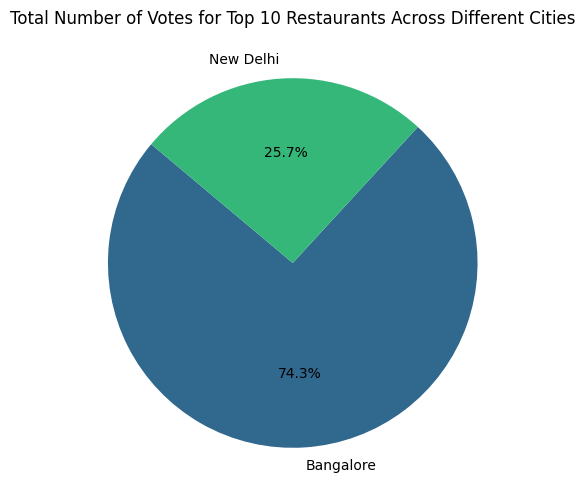

In [50]:
# Group by city and calculate the total votes
city_votes = top_10_restaurants.groupby('City')['Votes'].sum()

# Plot the total number of votes across different cities using a pie chart
plt.figure(figsize=(10, 6))
plt.pie(city_votes, labels=city_votes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(city_votes)))
plt.title('Total Number of Votes for Top 10 Restaurants Across Different Cities')
plt.show()

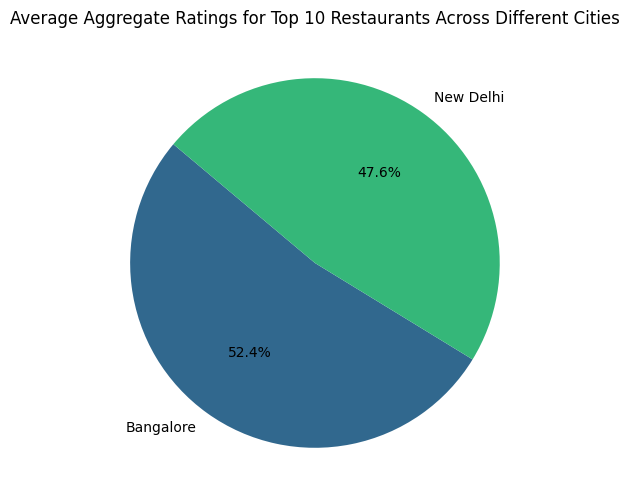

In [51]:
# Group by city and calculate the average rating
city_ratings = top_10_restaurants.groupby('City')['Aggregate rating'].mean()

# Plot the aggregate ratings across different cities using a pie chart
plt.figure(figsize=(10, 6))
plt.pie(city_ratings, labels=city_ratings.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(city_ratings)))
plt.title('Average Aggregate Ratings for Top 10 Restaurants Across Different Cities')
plt.show()


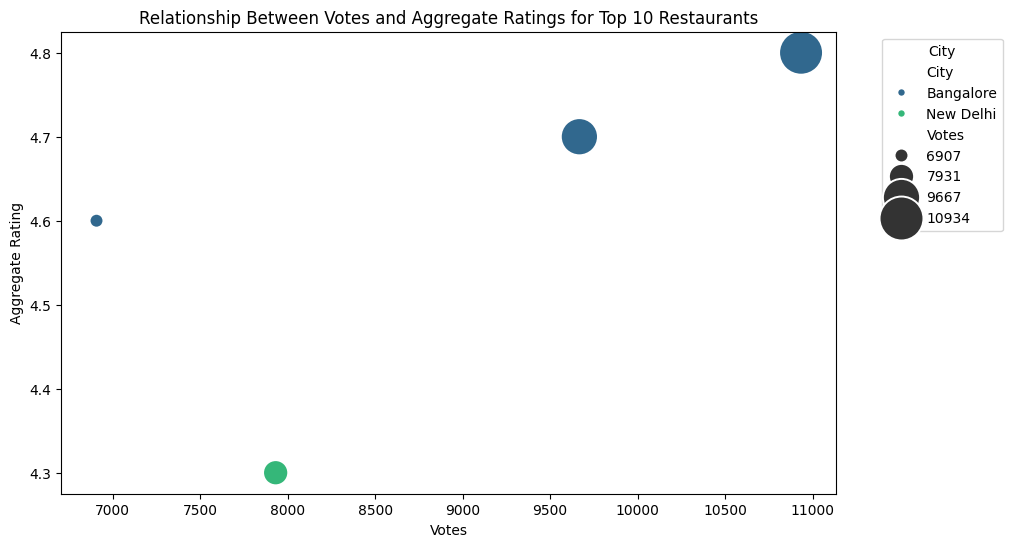

In [53]:
# Scatter plot to show the relationship between votes and aggregate ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10_restaurants, x='Votes', y='Aggregate rating', hue='City', size='Votes', sizes=(100, 1000), palette='viridis')
plt.title('Relationship Between Votes and Aggregate Ratings for Top 10 Restaurants')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## **Insights**

- Total Votes by City:

The pie chart indicates which cities have the highest total votes for their top 10 restaurants. This can highlight cities with high customer engagement.

- Aggregate Ratings by City:

The pie chart shows the average aggregate ratings of the top 10 restaurants in each city. This helps identify cities where top restaurants are highly rated.

- Votes vs. Ratings Relationship:

The scatter plot visualizes the relationship between votes and ratings. Restaurants with higher votes typically have higher ratings, indicating customer satisfaction and engagement.

##**Conclusion**
The analysis provides valuable insights into how the total number of votes and aggregate ratings vary across different cities for the top 10 restaurants in India. Understanding the relationship between votes and ratings helps identify high-engagement restaurants and can guide strategies to enhance customer satisfaction and engagement.

**8. Rating and Cost Patterns by High-End vs. Budget Cuisines**

Question: For high-end (price range = 4) and budget (price range = 1)
cuisines, how do average ratings vary across cities, and which cuisines
tend to be rated highest within these price brackets?

In [74]:
# Filter the data for high-end (price range = 4) and budget (price range = 1) cuisines
high_end_cuisines = merged_df[merged_df['Price range'] == 4]
budget_cuisines = merged_df[merged_df['Price range'] == 1]


In [75]:
# Calculate average ratings for high-end cuisines
high_end_avg_ratings = high_end_cuisines.groupby(['City', 'Cuisines'])['Aggregate rating'].mean().reset_index()

# Calculate average ratings for budget cuisines
budget_avg_ratings = budget_cuisines.groupby(['City', 'Cuisines'])['Aggregate rating'].mean().reset_index()


In [76]:
# Identify top-rated high-end cuisines
top_high_end_cuisines = high_end_avg_ratings.sort_values(by='Aggregate rating', ascending=False).groupby('City').head(1).reset_index(drop=True)

# Identify top-rated budget cuisines
top_budget_cuisines = budget_avg_ratings.sort_values(by='Aggregate rating', ascending=False).groupby('City').head(1).reset_index(drop=True)


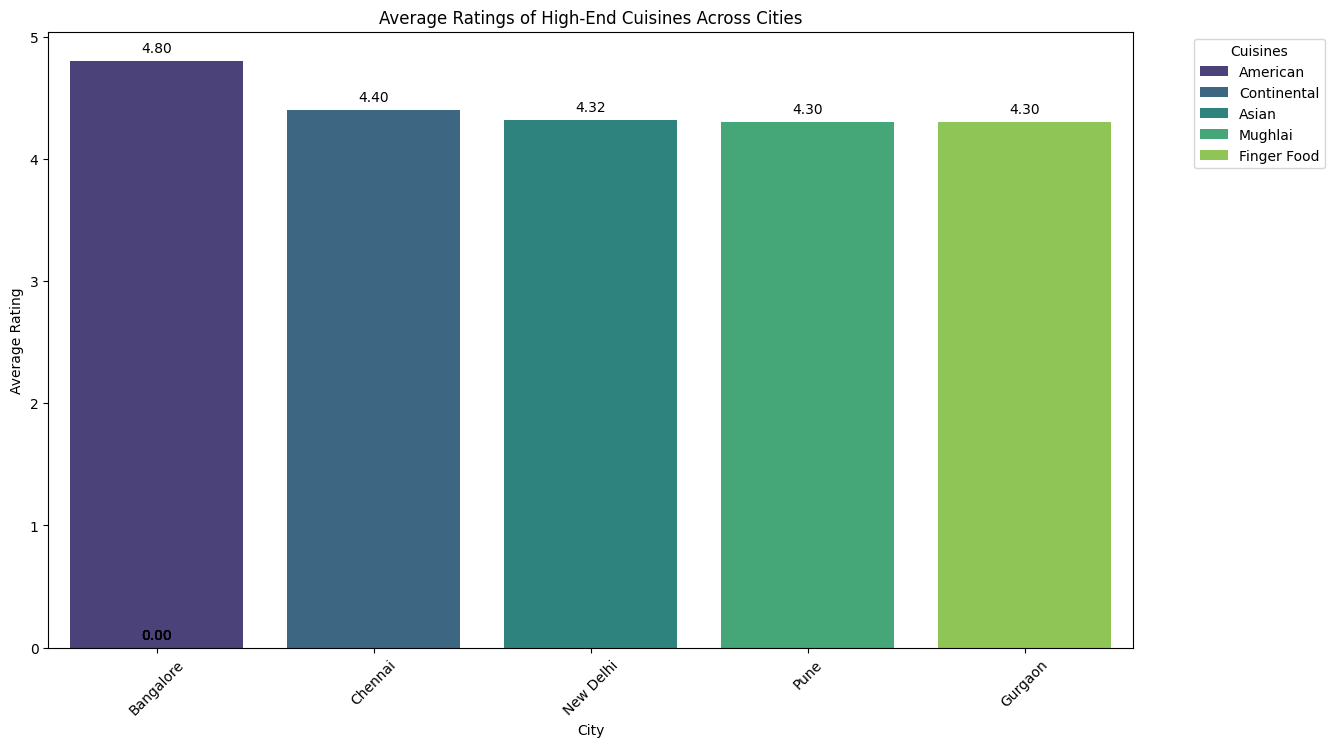

In [79]:
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=top_high_end_cuisines, x='City', y='Aggregate rating', hue='Cuisines', palette='viridis')

# Add data labels
for p in bar_plot.patches:
  bar_plot.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

plt.title('Average Ratings of High-End Cuisines Across Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Cuisines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


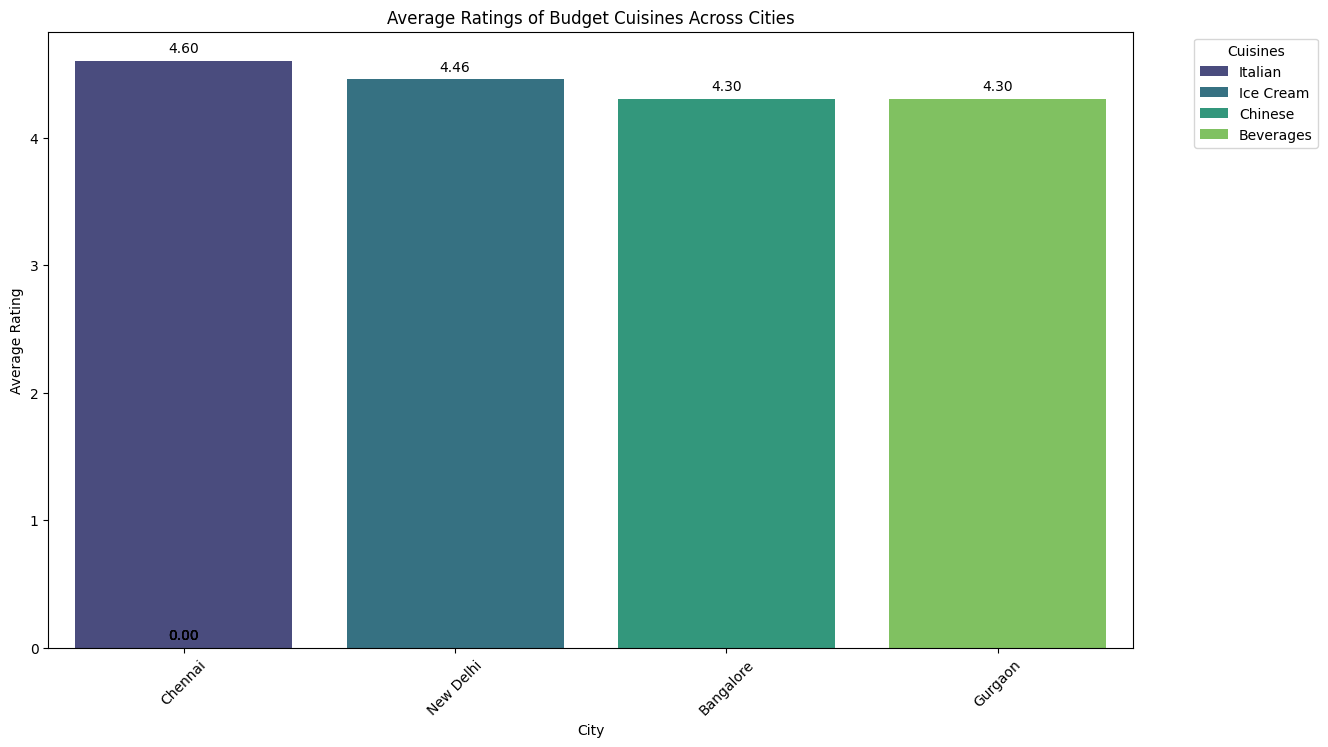

In [81]:
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=top_budget_cuisines, x='City', y='Aggregate rating', hue='Cuisines', palette='viridis')

# Add data labels
for p in bar_plot.patches:
  bar_plot.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

plt.title('Average Ratings of Budget Cuisines Across Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Cuisines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **Insights**
- Average Ratings by Price Range:

The bar charts show the average ratings of high-end and budget cuisines across different cities.

This helps identify which cities have the highest-rated high-end and budget cuisines.

- Top-Rated Cuisines:

The visualizations highlight which cuisines tend to be rated highest within the high-end and budget price brackets.

This provides insights into customer preferences and satisfaction with different types of cuisines at varying price points.

**9. Popularity and Rating of Cuisine Combinations in Major Cities**

Question: Which are the top 10 most popular cuisines based on total
votes, and how do their average ratings and price ranges compare?

In [22]:
# Filter the data for highly rated restaurants (rating above 4)
highly_rated = merged_df[merged_df['Aggregate rating'] > 4]

# Split the 'Cuisines' column into multiple rows
cuisines_split = highly_rated['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
highly_rated = highly_rated.drop(columns=['Cuisines']).join(cuisines_split.rename('Cuisines'))


In [54]:
# Calculate total votes for each cuisine
top_cuisines_votes = highly_rated.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10).reset_index()

# Display the top 10 cuisines based on total votes
print(top_cuisines_votes)


        Cuisines   Votes
0   North Indian  129532
1    Continental   92605
2        Italian   90169
3           Cafe   43365
4        Chinese   42955
5          Asian   31533
6       European   28706
7       American   20877
8  Mediterranean   16611
9       Desserts   14346


In [55]:
# Calculate average ratings and price ranges for top cuisines
top_cuisines_details = highly_rated[highly_rated['Cuisines'].isin(top_cuisines_votes['Cuisines'])]
top_cuisines_summary = top_cuisines_details.groupby('Cuisines').agg(
    average_rating=('Aggregate rating', 'mean'),
    average_price=('Average Cost for two', 'mean')
).reset_index()

# Merge with the total votes data
top_cuisines_summary = pd.merge(top_cuisines_votes, top_cuisines_summary, on='Cuisines')

# Display the summary
print(top_cuisines_summary)


        Cuisines   Votes  average_rating  average_price
0   North Indian  129532        4.285496    1482.824427
1    Continental   92605        4.272043    1303.763441
2        Italian   90169        4.278022    1370.329670
3           Cafe   43365        4.281818     750.000000
4        Chinese   42955        4.247059    1404.411765
5          Asian   31533        4.269231    1620.512821
6       European   28706        4.300000    2088.095238
7       American   20877        4.733333    1250.000000
8  Mediterranean   16611        4.516667    1416.666667
9       Desserts   14346        4.264706     485.294118


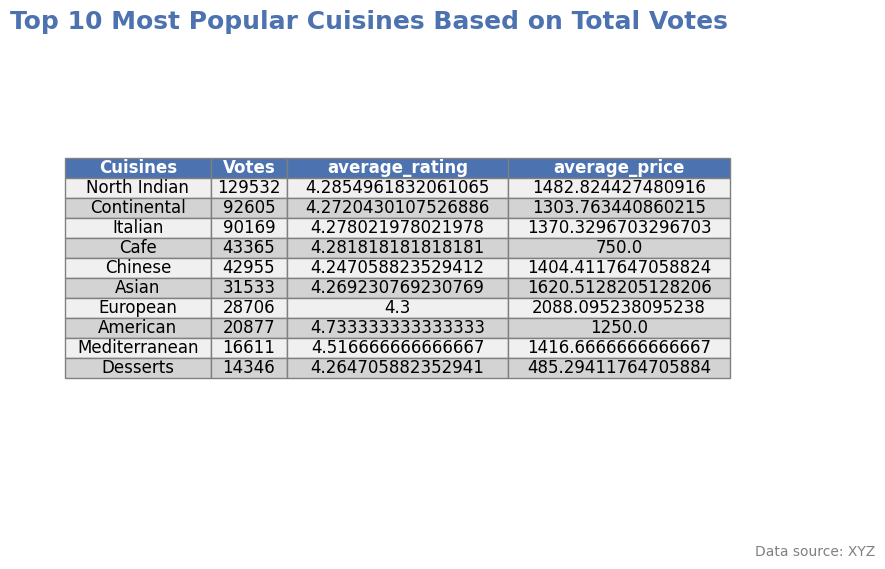

In [88]:
# Display the table of top 10 cuisines
import matplotlib.pyplot as plt

# Beautify the table plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=top_cuisines_summary.values,
                 colLabels=top_cuisines_summary.columns,
                 cellLoc='center',
                 loc='center')

# Set the font sizes and colors
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(top_cuisines_summary.columns))))

# Set table styles
table.scale(1.2, 1.2)  # Scale the table
for key, cell in table.get_celld().items():
    cell.set_edgecolor('gray')  # Set edge color
    cell.set_linewidth(1)  # Set line width
    if key[0] == 0:  # Header cells
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4C72B0')  # Header background color
    else:  # Body cells
        cell.set_facecolor('#F0F0F0')  # Alternating row background color
        if key[0] % 2 == 0:
            cell.set_facecolor('#D3D3D3')

# Add a title with more details
plt.title('Top 10 Most Popular Cuisines Based on Total Votes', fontsize=18, weight='bold', color='#4C72B0', loc='left')
plt.figtext(0.99, 0.01, 'Data source: XYZ', ha='right', va='bottom', fontsize=10, color='gray')
plt.show()



<ipython-input-57-d53d49e27f65>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Cuisines', y='Votes', data=top_cuisines_summary, palette='viridis')


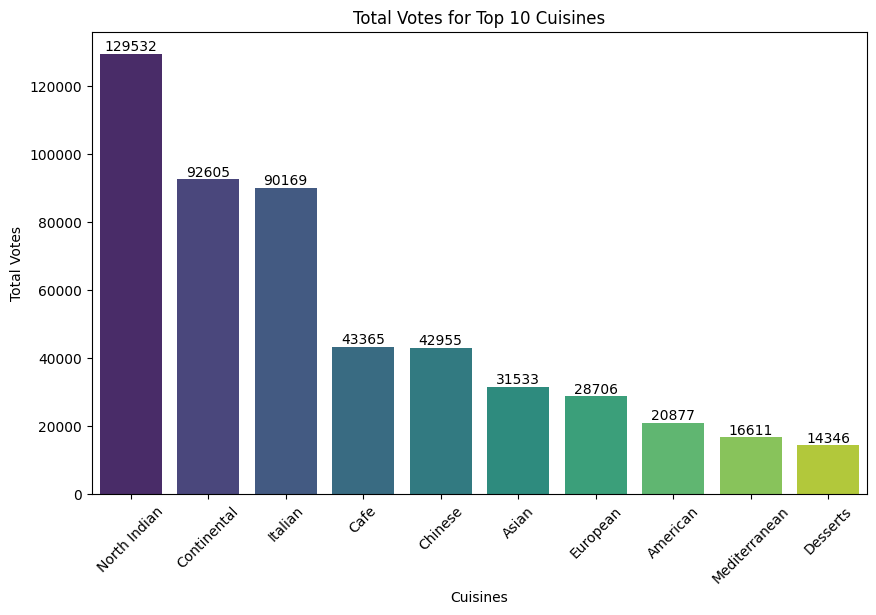

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart for total votes
ax1 = sns.barplot(x='Cuisines', y='Votes', data=top_cuisines_summary, palette='viridis')
ax1.set_title('Total Votes for Top 10 Cuisines')
ax1.set_ylabel('Total Votes')
ax1.set_xlabel('Cuisines')

# Adding data labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()


<ipython-input-58-a21603e1b9cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Cuisines', y='average_rating', data=top_cuisines_summary, palette='viridis')


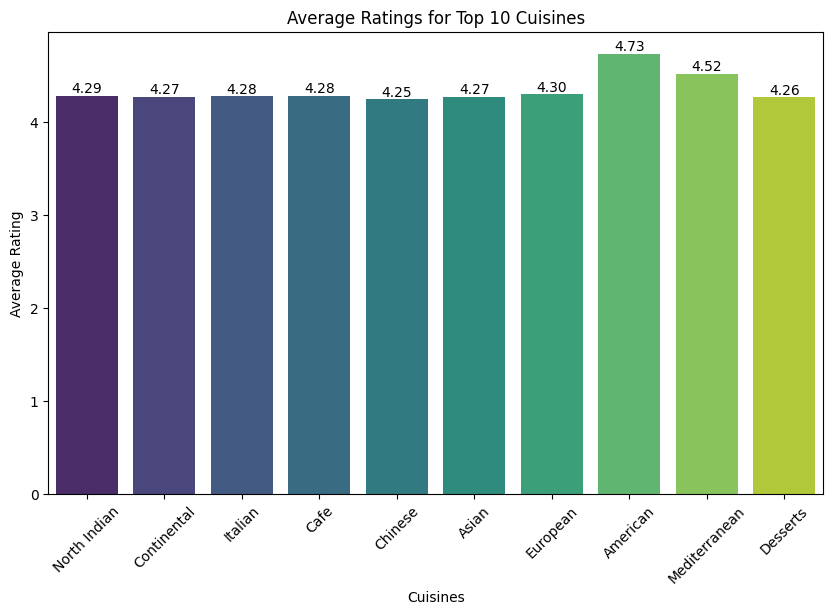

In [58]:
# Create a bar chart for average ratings
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='Cuisines', y='average_rating', data=top_cuisines_summary, palette='viridis')
ax2.set_title('Average Ratings for Top 10 Cuisines')
ax2.set_ylabel('Average Rating')
ax2.set_xlabel('Cuisines')

# Adding data labels
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()

<ipython-input-59-cb94f7139217>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x='Cuisines', y='average_price', data=top_cuisines_summary, palette='viridis')


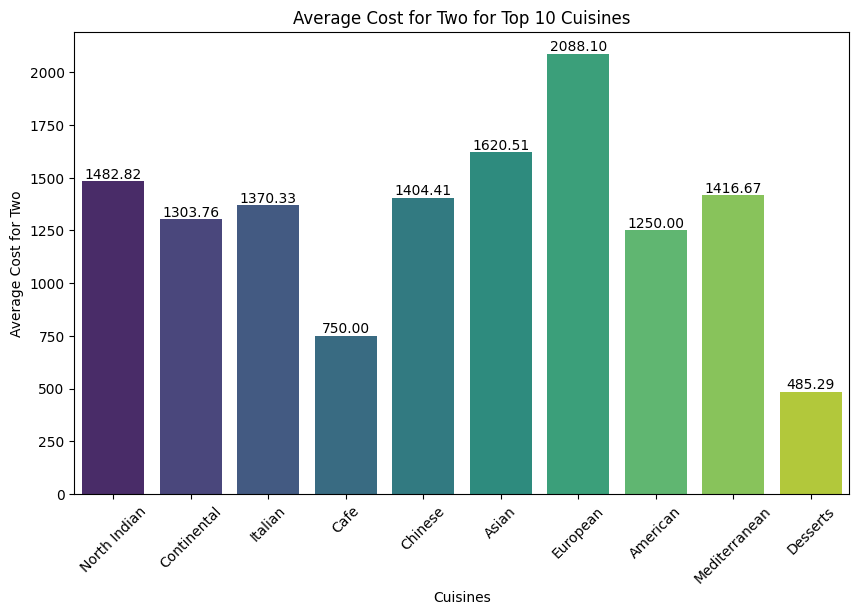

In [59]:
# Create a bar chart for average cost for two
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='Cuisines', y='average_price', data=top_cuisines_summary, palette='viridis')
ax3.set_title('Average Cost for Two for Top 10 Cuisines')
ax3.set_ylabel('Average Cost for Two')
ax3.set_xlabel('Cuisines')

# Adding data labels
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()

## **Insights**
- Top Cuisines by Votes: The table shows the cuisines with the highest total votes, indicating their popularity.

- Average Ratings: Comparing average ratings helps understand customer satisfaction with each cuisine.

- Average Price Range: The average cost for two gives an idea of the price range for each cuisine, helping to identify value for money.

**10. Analysis of Service Offerings on Customer Engagement by Price Range**

Question: How does the availability of online delivery impact the number
of customer votes for restaurants in different price ranges?

In [60]:
# Convert 'Has Online delivery' column to numeric
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Filter the data for highly rated restaurants (rating above 4)
highly_rated = df[df['Aggregate rating'] > 4]


In [61]:
# Group by price range and online delivery, then calculate the average number of votes
votes_by_price_delivery = highly_rated.groupby(['Price range', 'Has Online delivery'])['Votes'].mean().reset_index()

# Display the result
print(votes_by_price_delivery)


   Price range  Has Online delivery        Votes
0            1                    0   489.000000
1            1                    1   380.068966
2            2                    0   494.916279
3            2                    1   661.112245
4            3                    0   734.239766
5            3                    1  1005.936170
6            4                    0   541.398058
7            4                    1   906.352941


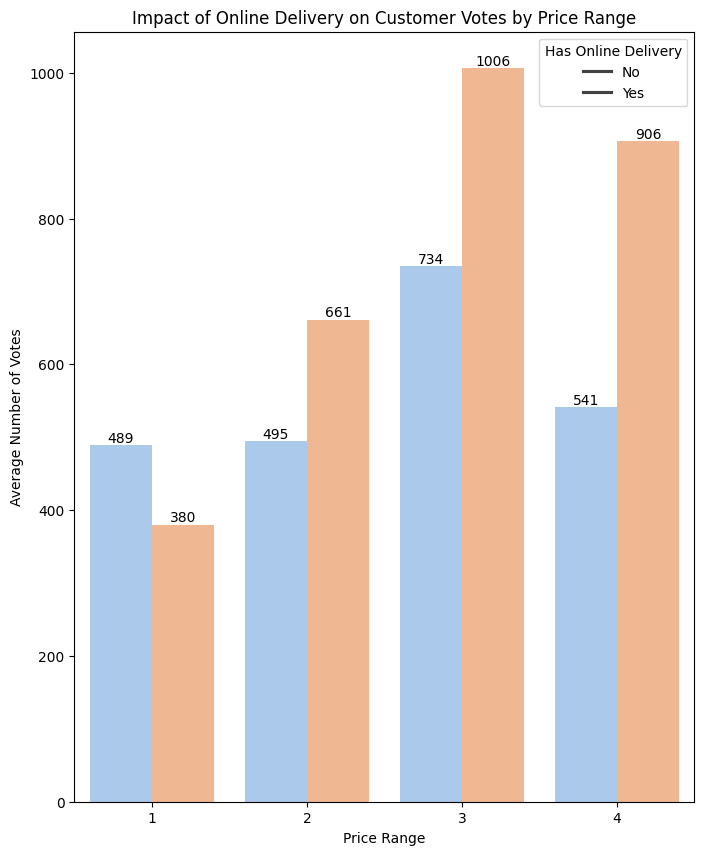

In [62]:
# Plotting the average number of votes by price range and online delivery
plt.figure(figsize=(8, 10))
ax = sns.barplot(data=votes_by_price_delivery, x='Price range', y='Votes', hue='Has Online delivery', palette='pastel')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, color='black')

plt.title('Impact of Online Delivery on Customer Votes by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Number of Votes')
plt.legend(title='Has Online Delivery', loc='upper right', labels=['No', 'Yes'])
plt.show()


## **Insights**
- Customer Votes by Price Range: The bar chart shows the average number of votes for restaurants in different price ranges, comparing those with and without online delivery.

- Impact of Online Delivery:

- Restaurants with online delivery generally receive more customer votes, indicating higher engagement.

- The impact varies across different price ranges, with some price ranges showing a more significant difference between restaurants with and without delivery.

**11. Comparitive Competitor Analysis of Zomato & Swiggy**

In [91]:
# Swiggy Profit & Loss Data
swiggy_pl_data = {
    'Report Date': ['Mar-21', 'Mar-22', 'Mar-23', 'Mar-24'],
    'Sales': [2546.9, 5704.9, 8264.6, 11247.39],
    'Raw Material Cost': [564.5, 2275.59, 3373.95, 4615.83],
    'Change in Inventory': [-5.6, 7.55, -6.92, 11.63],
    'Power and Fuel': [22.1, 29.99, 18.62, 56.69],
    'Other Mfr. Exp': [55.7, 292.94, 496.41, 366.52],
    'Employee Cost': [1085.3, 1708.49, 2129.82, 2012.16],
    'Selling and admin': [830.6, 4656.35, 6019.5, 5758.96],
    'Other Expenses': [1279.4, 398.76, 492.47, 648.24],
    'Other Income': [-19.1, 239.24, 437.76, 341.12],
    'Depreciation': [220.9, 170.09, 285.79, 420.59],
    'Interest': [75.3, 48.38, 58.19, 71.4],
    'Profit before tax': [-1611.6, -3628.9, -4179.31, -2350.25],
    'Net profit': [-1616.9, -3628.9, -4179.31, -2350.24]
}

# Swiggy Balance Sheet Data
swiggy_bs_data = {
    'Report Date': ['Mar-21', 'Mar-22', 'Mar-23', 'Mar-24'],
    'Equity Share Capital': [0.01, 0.86, 2.66, 3.01],
    'Reserves': [1736.5, -3296.49, -6508.59, -7784.81],
    'Borrowings': [92.68, 16070.75, 16162.14, 16437.45],
    'Other Liabilities': [1085.92, 1636.73, 1624.43, 1873.77],
    'Total': [2915.11, 14411.85, 11280.64, 10529.42],
    'Net Block': [746.7, 800.98, 1505.09, 2041.36],
    'Investments': [925.3, 10348, 6540.53, 5171.11],
    'Other Assets': [1243.11, 3262.87, 3235.02, 3316.95],
    'Receivables': [165.4, 1111.93, 1062.35, 963.85],
    'Inventory': [16, 23.86, 10.64, 48.69],
    'Cash & Bank': [702.5, 1103.87, 863.92, 890.85]
}

# Convert dictionaries to DataFrames
swiggy_pl_df = pd.DataFrame(swiggy_pl_data)
swiggy_bs_df = pd.DataFrame(swiggy_bs_data)

print(swiggy_pl_df)
print(swiggy_bs_df)

# Combine Profit & Loss and Balance Sheet Data
swiggy_df = pd.merge(swiggy_pl_df, swiggy_bs_df, on='Report Date')
print(swiggy_df)


  Report Date     Sales  Raw Material Cost  Change in Inventory  \
0      Mar-21   2546.90             564.50                -5.60   
1      Mar-22   5704.90            2275.59                 7.55   
2      Mar-23   8264.60            3373.95                -6.92   
3      Mar-24  11247.39            4615.83                11.63   

   Power and Fuel  Other Mfr. Exp  Employee Cost  Selling and admin  \
0           22.10           55.70        1085.30             830.60   
1           29.99          292.94        1708.49            4656.35   
2           18.62          496.41        2129.82            6019.50   
3           56.69          366.52        2012.16            5758.96   

   Other Expenses  Other Income  Depreciation  Interest  Profit before tax  \
0         1279.40        -19.10        220.90     75.30           -1611.60   
1          398.76        239.24        170.09     48.38           -3628.90   
2          492.47        437.76        285.79     58.19           -4179.31

In [92]:
swiggy_df.head()

,Report Date,Sales,Raw Material Cost,Change in Inventory,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,...,Reserves,Borrowings,Other Liabilities,Total,Net Block,Investments,Other Assets,Receivables,Inventory,Cash & Bank
0,Mar-21,2546.90,564.50,-5.60,22.10,55.70,1085.30,830.60,1279.40,-19.10,...,1736.50,92.68,1085.92,2915.11,746.70,925.30,1243.11,165.40,16.00,702.50
1,Mar-22,5704.90,2275.59,7.55,29.99,292.94,1708.49,4656.35,398.76,239.24,...,-3296.49,16070.75,1636.73,14411.85,800.98,10348.00,3262.87,1111.93,23.86,1103.87
2,Mar-23,8264.60,3373.95,-6.92,18.62,496.41,2129.82,6019.50,492.47,437.76,...,-6508.59,16162.14,1624.43,11280.64,1505.09,6540.53,3235.02,1062.35,10.64,863.92
3,Mar-24,11247.39,4615.83,11.63,56.69,366.52,2012.16,5758.96,648.24,341.12,...,-7784.81,16437.45,1873.77,10529.42,2041.36,5171.11,3316.95,963.85,48.69,890.85


**Zomato Dataset**

In [93]:
# Zomato Profit & Loss Data
zomato_pl_data = {
    'Report Date': ['Mar-18', 'Mar-19', 'Mar-20', 'Mar-21', 'Mar-22', 'Mar-23', 'Mar-24'],
    'Sales': [466.02, 1312.59, 2604.74, 1993.8, 4192.4, 7079, 12114],
    'Raw Material Cost': [None, 18.72, 110.52, 202.9, 552.4, 1438, 2887],
    'Change in Inventory': [None, 2.13, 1.6, 11, 27.8, 43, 5],
    'Power and Fuel': [2.41, 3.17, 6.29, 1.9, 4, 23, 51],
    'Other Mfr. Exp': [49.81, 1339.7, 2108.91, 74.5, 183.3, 384, 521],
    'Employee Cost': [290.49, 600.79, 798.88, 740.8, 1633.1, 1465, 1659],
    'Selling and admin': [182.17, 1514.3, 1756.34, 1435, 3654.4, 4961, 6882],
    'Other Expenses': [33.59, 81.52, 130.1, 16.8, 43.8, 62, 76],
    'Other Income': [21.03, 1285.05, 15.97, -200.2, 792.6, 682, 846],
    'Depreciation': [29.15, 43.12, 84.24, 137.7, 150.3, 437, 526],
    'Interest': [6.35, 8.69, 12.64, 10.1, 12, 49, 72],
    'Profit before tax': [-106.92, -1010.24, -2385.61, -815.1, -1220.5, -1015, 291],
    'Net profit': [-103.68, -964.95, -2367.16, -812.8, -1208.7, -971, 351]
}

# Zomato Balance Sheet Data
zomato_bs_data = {
    'Report Date': ['Mar-18', 'Mar-19', 'Mar-20', 'Mar-21', 'Mar-22', 'Mar-23', 'Mar-24'],
    'Equity Share Capital': [0.03, 0.03, 0.03, None, 764.3, 836, 868],
    'Reserves': [1036.06, 2355.61, 457.35, 7643.8, 15741.2, 18624, 19545],
    'Borrowings': [186.23, 347.94, 325.58, 527.4, 70.3, 507, 749],
    'Other Liabilities': [152.17, 709.3, 2117.43, 532.3, 751.2, 1632, 2194],
    'Total': [1374.49, 3412.88, 2900.39, 8703.5, 17327, 21599, 23356],
    'Net Block': [189.8, 389.08, 1590.55, 1539, 1404.3, 6344, 6448],
    'Capital Work in Progress': [1.29, 0.74, 0.96, 0.1, 0.6, 7, 18],
    'Investments': [829.23, 2144.55, 323.92, 2205.2, 4717.7, 6765, 11645],
    'Other Assets': [354.17, 878.51, 984.96, 4959.2, 11204.4, 8483, 5245],
    'Receivables': [26.08, 70.34, 123.12, 129.9, 159.9, 457, 794],
    'Inventory': [None, 2.13, 3.73, 14.8, 39.7, 83, 88],
    'Cash & Bank': [208.07, 238.69, 359.88, 903.6, 1575.5, 1017, 731]
}

# Convert dictionaries to DataFrames
zomato_pl_df = pd.DataFrame(zomato_pl_data)
zomato_bs_df = pd.DataFrame(zomato_bs_data)

print(zomato_pl_df)
print(zomato_bs_df)

# Combine Profit & Loss and Balance Sheet Data
zomato_df = pd.merge(zomato_pl_df, zomato_bs_df, on='Report Date')
print(zomato_df)

  Report Date     Sales  Raw Material Cost  Change in Inventory  \
0      Mar-18    466.02                NaN                  NaN   
1      Mar-19   1312.59              18.72                 2.13   
2      Mar-20   2604.74             110.52                 1.60   
3      Mar-21   1993.80             202.90                11.00   
4      Mar-22   4192.40             552.40                27.80   
5      Mar-23   7079.00            1438.00                43.00   
6      Mar-24  12114.00            2887.00                 5.00   

   Power and Fuel  Other Mfr. Exp  Employee Cost  Selling and admin  \
0            2.41           49.81         290.49             182.17   
1            3.17         1339.70         600.79            1514.30   
2            6.29         2108.91         798.88            1756.34   
3            1.90           74.50         740.80            1435.00   
4            4.00          183.30        1633.10            3654.40   
5           23.00          384.00    

In [94]:
zomato_df

,Report Date,Sales,Raw Material Cost,Change in Inventory,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,...,Borrowings,Other Liabilities,Total,Net Block,Capital Work in Progress,Investments,Other Assets,Receivables,Inventory,Cash & Bank
0,Mar-18,466.02,NaN,NaN,2.41,49.81,290.49,182.17,33.59,21.03,...,186.23,152.17,1374.49,189.80,1.29,829.23,354.17,26.08,NaN,208.07
1,Mar-19,1312.59,18.72,2.13,3.17,1339.70,600.79,1514.30,81.52,1285.05,...,347.94,709.30,3412.88,389.08,0.74,2144.55,878.51,70.34,2.13,238.69
2,Mar-20,2604.74,110.52,1.60,6.29,2108.91,798.88,1756.34,130.10,15.97,...,325.58,2117.43,2900.39,1590.55,0.96,323.92,984.96,123.12,3.73,359.88
3,Mar-21,1993.80,202.90,11.00,1.90,74.50,740.80,1435.00,16.80,-200.20,...,527.40,532.30,8703.50,1539.00,0.10,2205.20,4959.20,129.90,14.80,903.60
4,Mar-22,4192.40,552.40,27.80,4.00,183.30,1633.10,3654.40,43.80,792.60,...,70.30,751.20,17327.00,1404.30,0.60,4717.70,11204.40,159.90,39.70,1575.50
5,Mar-23,7079.00,1438.00,43.00,23.00,384.00,1465.00,4961.00,62.00,682.00,...,507.00,1632.00,21599.00,6344.00,7.00,6765.00,8483.00,457.00,83.00,1017.00
6,Mar-24,12114.00,2887.00,5.00,51.00,521.00,1659.00,6882.00,76.00,846.00,...,749.00,2194.00,23356.00,6448.00,18.00,11645.00,5245.00,794.00,88.00,731.00


In [95]:
# Create a list of dates to remove
dates_to_remove = ['Mar-18', 'Mar-19', 'Mar-20']

# Filter the DataFrame to exclude rows with those dates
zomato_df = zomato_df[~zomato_df['Report Date'].isin(dates_to_remove)]

In [96]:
zomato_df

,Report Date,Sales,Raw Material Cost,Change in Inventory,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,...,Borrowings,Other Liabilities,Total,Net Block,Capital Work in Progress,Investments,Other Assets,Receivables,Inventory,Cash & Bank
3,Mar-21,1993.8,202.9,11.0,1.9,74.5,740.8,1435.0,16.8,-200.2,...,527.4,532.3,8703.5,1539.0,0.1,2205.2,4959.2,129.9,14.8,903.6
4,Mar-22,4192.4,552.4,27.8,4.0,183.3,1633.1,3654.4,43.8,792.6,...,70.3,751.2,17327.0,1404.3,0.6,4717.7,11204.4,159.9,39.7,1575.5
5,Mar-23,7079.0,1438.0,43.0,23.0,384.0,1465.0,4961.0,62.0,682.0,...,507.0,1632.0,21599.0,6344.0,7.0,6765.0,8483.0,457.0,83.0,1017.0
6,Mar-24,12114.0,2887.0,5.0,51.0,521.0,1659.0,6882.0,76.0,846.0,...,749.0,2194.0,23356.0,6448.0,18.0,11645.0,5245.0,794.0,88.0,731.0


**Sales Growth**

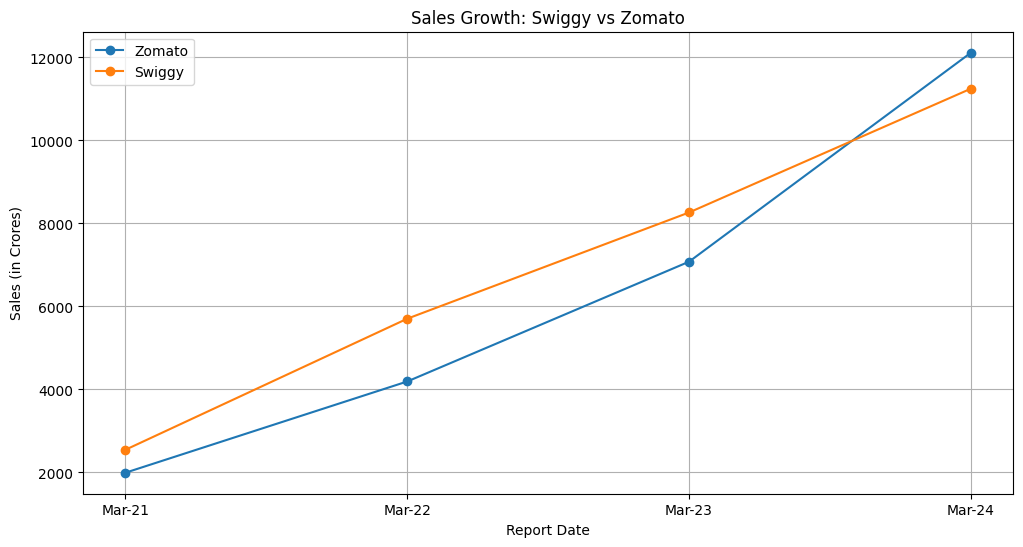

In [97]:
# Sort DataFrames by index (assuming 'Report Date' is the index)
swiggy_df = swiggy_df.sort_index(ascending=True)
zomato_df = zomato_df.sort_index(ascending=True)

plt.figure(figsize=(12, 6))

# Sales Growth
plt.plot(zomato_df['Report Date'], zomato_df['Sales'], marker='o', label='Zomato')
plt.plot(swiggy_df['Report Date'], swiggy_df['Sales'], marker='o', label='Swiggy')
plt.title('Sales Growth: Swiggy vs Zomato')
plt.xlabel('Report Date')
plt.ylabel('Sales (in Crores)')
plt.legend()
plt.grid(True)
plt.show()


**Net Profit Comparison**

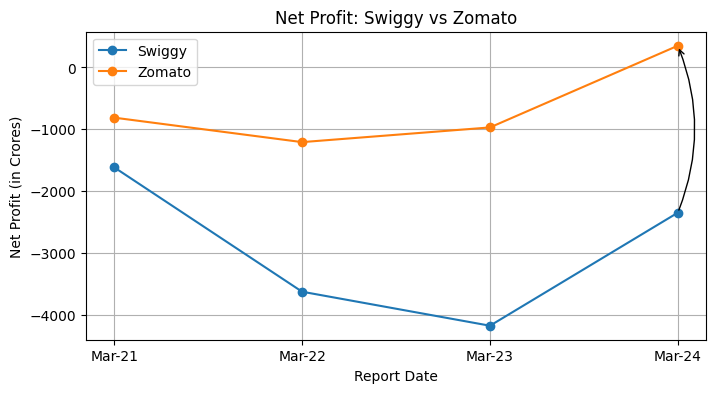

In [98]:
plt.figure(figsize=(8, 4))

# Net Profit Comparison
plt.plot(swiggy_df['Report Date'], swiggy_df['Net profit'], marker='o', label='Swiggy')
plt.plot(zomato_df['Report Date'], zomato_df['Net profit'], marker='o', label='Zomato')

# Find the last data points for Swiggy and Zomato
swiggy_last_x = swiggy_df['Report Date'].iloc[-1]
swiggy_last_y = swiggy_df['Net profit'].iloc[-1]
zomato_last_x = zomato_df['Report Date'].iloc[-1]
zomato_last_y = zomato_df['Net profit'].iloc[-1]

# Add the arrow to indicate the gap
plt.annotate('', xy=(zomato_last_x, zomato_last_y), xytext=(swiggy_last_x, swiggy_last_y),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', color='black'))

plt.title('Net Profit: Swiggy vs Zomato')
plt.xlabel('Report Date')
plt.ylabel('Net Profit (in Crores)')
plt.legend()
plt.grid(True)
plt.show()

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- In this part we need to provide a conclusion about your overall analysis.

- Write down some short points that you have observed so far.

<a name = Section92></a>
### **9.2 Actionable Insights**

- This is a very crucial part where you will present your actionable insights.
- You need to give suggestions about what could be applied and what not.
- Make sure that these suggestions are short and to the point, ultimately it's a catalyst to your business.

Enter your Observations Here